# UNIVARIATE CASE

## A. Generate 20 real number for the variable X from the uniform distribution U [0,1].

In [ ]:
import numpy as np
import math
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# uniform distribution of 20 real number
X_train=np.random.uniform(0,1,20)
X_train

array([0.89637442, 0.75578496, 0.96915174, 0.00320602, 0.23676778,
       0.75216217, 0.1686464 , 0.63701287, 0.53867105, 0.42262484,
       0.75439356, 0.53374677, 0.2581082 , 0.01009332, 0.0122256 ,
       0.50611444, 0.94004682, 0.75465174, 0.4664752 , 0.07107537])

## B. Construct the training set T = { ($x_{1}$, $y_{1}$), ($x_{2}$, $y_{2}$), ... , ($x_{20}$, $y_{20}$)} using the relation :

##$Y_{i}$  = sin(2 π $x_{i}$) + $ε_{i}$ where $ε_{i}$ ~ N(0,0.25)


In [ ]:
Y_train =[]

for x_val in X_train:
    Yi = math.sin(2 * math.pi * x_val) + np.random.uniform(0, 0.25) 
    Y_train.append(Yi)

# For better understanding, let's convert X and Y training dataset into a dataframe
df_train = pd.DataFrame(data=(X_train,Y_train),index=['X_train','Y_train'])
df_train = df_train.T
df_train

,X_train,Y_train
0,0.896374,-0.450947
1,0.755785,-0.868803
2,0.969152,0.036376
3,0.003206,0.154369
4,0.236768,1.170838
5,0.752162,-0.775634
6,0.168646,1.070551
7,0.637013,-0.743531
8,0.538671,-0.085412
9,0.422625,0.509603


## C. In the similar way construct a testing set of size 50, i.e. Test = { ($x'_{1}$, $y'_{1}$), ($x'_{2}$, $y'_{2}$), ... , ($x'_{50}$, $y'_{50}$)}

In [ ]:
X_test = np.random.uniform(0,1,50)
Y_test = []

for i in X_test:
    Yi = math.sin(2 *math.pi*i) + np.random.uniform(0,0.25) 
    Y_test.append(Yi)

# For better understanding, let's convert X and Y testing dataset into a dataframe
df_test = pd.DataFrame(data=(X_test,Y_test),index=['X_test','Y_test'])
df_test = df_test.T
df_test

,X_test,Y_test
0,0.792763,-0.845674
1,0.762654,-0.779147
2,0.470067,0.356867
3,0.200718,0.968651
4,0.195596,1.041537
5,0.305547,1.148374
6,0.496392,0.027817
7,0.835354,-0.669025
8,0.020545,0.275470
9,0.845477,-0.724188


## D. Estimate the Regularized Least Squared Polynomial Regression model of order M= 1, 2, 3, 9 using the training set T.


## Example
## 1. For M=1 , we need to estimate F(x) = $β_{1}$x +  $β_{0}$
## 2. For M = 2,  F(x) =  $β_{2}$ $x^{2}$ +  $β_{1}$x +  $β_{0}$

### In the previous assignment, we observed that, as our value of the coefficients increases, this results in the problem  of overfitting. Overfitting occurs when the trained model performs well on the training data and performs poorly on the testing dataset. This can be taken care of by following steps :

### 1. By increasing the training dataset to better train our model.
### 2. Regularization methods that will apply a penalizing term (reducing the weights and biases) to overcome overfitting.


### Let's see how our graph looks like without "Regularization"...

In [ ]:
# Find LSPR for M = 1, 2, 3, 9

# Least Square Polynomial Regression
def LSPR(x_dataset, y_dataset, degree):
  no_of_rows = len(x_dataset)
  no_of_cols = degree+1

  # finding the X matrix

  # initialize X matrix with 0 initially
  X = np.zeros((no_of_rows, no_of_cols))
  for xi in range (no_of_rows):
    for deg in range (no_of_cols):
      X[xi][deg] += math.pow(x_dataset[xi], deg)
  
  # calculating ((X^T . X)^(−1)) . X^T . Y
  X_Trans_X_Inv = np.matrix((np.dot(X.T, X))).I
  temp = np.matrix(np.dot(X_Trans_X_Inv, X.T))
  return np.dot(temp, y_dataset.values)

LSP_ord_1 = np.array(LSPR(df_train['X_train'], df_train['Y_train'], 1))
LSP_ord_2 = np.array(LSPR(df_train['X_train'], df_train['Y_train'], 2))
LSP_ord_3 = np.array(LSPR(df_train['X_train'], df_train['Y_train'], 3))
LSP_ord_9 = np.array(LSPR(df_train['X_train'], df_train['Y_train'], 9))

In [ ]:
# Find the predicted values for M = 1, 2, 3, 9

# Get the 'x' test data as an array to pass on to polynomial function
X = np.array(df_test['X_test'])
y_predicted_m1 = []
y_predicted_m2 = []
y_predicted_m3 = []
y_predicted_m9 = []

# M = 1
for val in X:
  y_val = 0
  for deg in range(1, -1, -1):
    y_val += LSP_ord_1[0][deg] * math.pow(val, deg)
  y_predicted_m1.append(y_val)

df_predicted_m1 = pd.DataFrame(data=(X, y_predicted_m1),index=['X', 'Y_predicted']).T

# M = 2
for val in X:
  y_val = 0
  for deg in range(2, -1, -1):
    y_val += LSP_ord_2[0][deg] * math.pow(val, deg)
  y_predicted_m2.append(y_val)

df_predicted_m2 = pd.DataFrame(data=(X, y_predicted_m2),index=['X', 'Y_predicted']).T

# M = 3
for val in X:
  y_val = 0
  for deg in range(3, -1, -1):
    y_val += LSP_ord_3[0][deg] * math.pow(val, deg)
  y_predicted_m3.append(y_val)

df_predicted_m3 = pd.DataFrame(data=(X, y_predicted_m3),index=['X', 'Y_predicted']).T

# M = 9
for val in X:
  y_val = 0
  for deg in range(9, -1, -1):
    y_val += LSP_ord_9[0][deg] * math.pow(val, deg)
  y_predicted_m9.append(y_val)

df_predicted_m9 = pd.DataFrame(data=(X, y_predicted_m9),index=['X', 'Y_predicted']).T

Text(0.5, 1.0, 'Polynomial Regression for Testing Set')

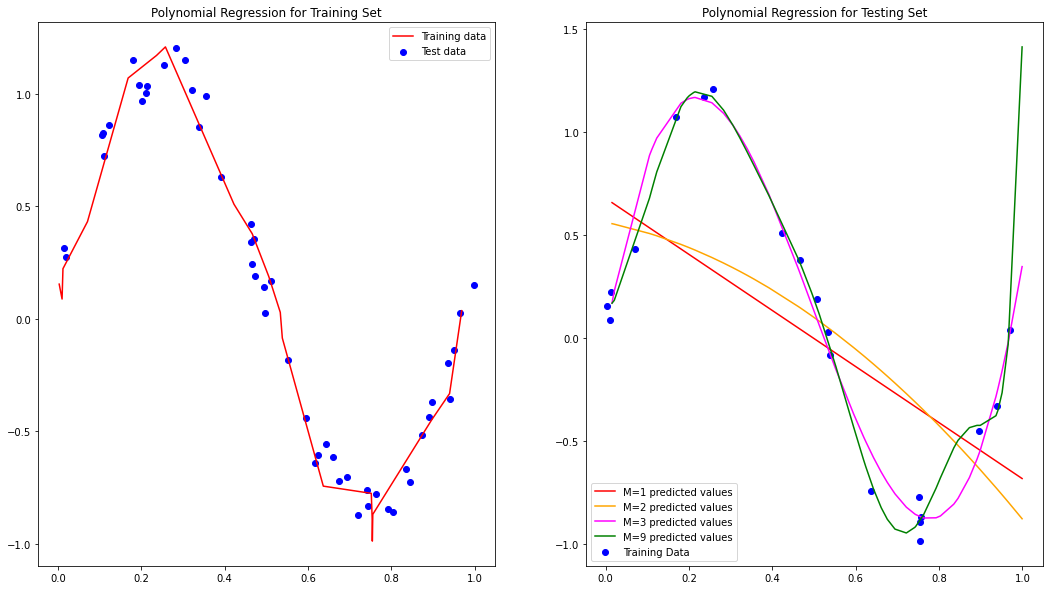

In [ ]:
# Plotting all the points to compare the regression graph

fig, axes = plt.subplots(1, 2, figsize=(18, 10))

df_train_sort = df_train.sort_values(by=['X_train'])
df_pred_sort_m1 = df_predicted_m1.sort_values(by=['X'])
df_pred_sort_m2 = df_predicted_m2.sort_values(by=['X'])
df_pred_sort_m3 = df_predicted_m3.sort_values(by=['X'])
df_pred_sort_m9 = df_predicted_m9.sort_values(by=['X'])

axes[0].plot(df_train_sort['X_train'], df_train_sort['Y_train'], color='red')
axes[0].scatter(df_test['X_test'], df_test['Y_test'], color='blue')
axes[0].legend(['Training data', 'Test data'])
axes[0].set_title('Polynomial Regression for Training Set')

axes[1].scatter(df_train['X_train'], df_train['Y_train'], color='blue')
axes[1].plot(df_pred_sort_m1['X'], df_pred_sort_m1['Y_predicted'], color='red')
axes[1].plot(df_pred_sort_m2['X'], df_pred_sort_m2['Y_predicted'], color='orange')
axes[1].plot(df_pred_sort_m3['X'], df_pred_sort_m3['Y_predicted'], color='magenta')
axes[1].plot(df_pred_sort_m9['X'], df_pred_sort_m9['Y_predicted'], color='green')
axes[1].legend(['M=1 predicted values', 'M=2 predicted values', 'M=3 predicted values', 'M=9 predicted values', 'Training Data'])
axes[1].set_title('Polynomial Regression for Testing Set')

## On comparing the values of coefficients $β_{1}$, $β_{2}$, $β_{2}$ ... for increasing order of M, we notice that the value of coefficients increases significantly on going from order 3 to order 9.

In [ ]:
print(f'The coefficiet for M=1: {LSP_ord_1}\n')
print(f'The coefficiet for M=2: {LSP_ord_2}\n')
print(f'The coefficiet for M=3: {LSP_ord_3}\n')
print(f'The coefficiet for M=9: {LSP_ord_9}\n')

The coefficiet for M=1: [[ 0.67738267 -1.36230721]]

The coefficiet for M=2: [[ 0.56084828 -0.40614083 -1.0359229 ]]

The coefficiet for M=3: [[-1.85385787e-03  1.18606440e+01 -3.48893843e+01  2.33858947e+01]]

The coefficiet for M=9: [[ 1.40696342e-01  1.38594483e+00  2.04955549e+01  6.06173024e+02
  -6.73946963e+03  2.76898301e+04 -5.88975234e+04  6.89580748e+04
  -4.21384600e+04  1.05008219e+04]]



## We can avoid overfitting by using so-called ''regularization''. How does it work? Usually, a function is prone to be overfitting when its coefficients (weighting values) has big values and not well distributed. Thus, we will force our training process to make those coefficients small by adding a term in our cost function. This process also makes those coefficients more well distributed. Here is our new cost function. (Questions E, F, G, H answered collectively for given value of M=1, 2, 3, 9)

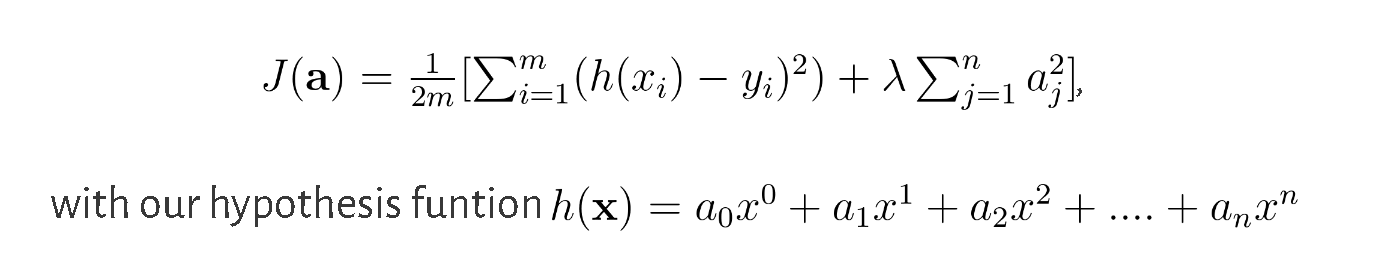

On solving, we get a = [$a_{0}$, $a_{1}$, $a_{2}$, ... , $a_{n}$] as

$({X^{T}} X+λ.I )^{-1}$ . $X^{T}$.y

In [ ]:
# Least Square Polynomial Regression
def regularized_LSPR(x_dataset, y_dataset, degree, Lambda):
  no_of_rows = len(x_dataset)
  no_of_cols = degree+1

  # finding the X matrix

  # initialize X matrix with 0 initially
  X = np.zeros((no_of_rows, no_of_cols))
  lam_I = np.identity(degree+1)*Lambda
  for xi in range (no_of_rows):
    for deg in range (no_of_cols):
      X[xi][deg] += math.pow(x_dataset[xi], deg)
  
  # calculating ((X^T . X)^(−1)) . X^T . Y
  X_Trans_X = np.matrix((np.dot(X.T, X)))
  X_Trans_X = np.add(X_Trans_X, lam_I)
  X_Trans_X_Inv = X_Trans_X.I
  temp = np.matrix(np.dot(X_Trans_X_Inv, X.T))
  return np.dot(temp, y_dataset.values)

### For order m=1

#### List the value of coefficients of estimated regularized least squared polynomial regression models for each case.

In [ ]:
reg_LSP_ord_1_0 = np.array(regularized_LSPR(df_train['X_train'], df_train['Y_train'], 1, 0))
reg_LSP_ord_1_1 = np.array(regularized_LSPR(df_train['X_train'], df_train['Y_train'], 1, 1))
reg_LSP_ord_1_5 = np.array(regularized_LSPR(df_train['X_train'], df_train['Y_train'], 1, 5))
reg_LSP_ord_1_10 = np.array(regularized_LSPR(df_train['X_train'], df_train['Y_train'], 1, 10))

print(f'coefficient value with regularization and λ = 0: {reg_LSP_ord_1_0}')
print(f'coefficient value with regularization and λ = 1: {reg_LSP_ord_1_1}')
print(f'coefficient value with regularization and λ = 5: {reg_LSP_ord_1_5}')
print(f'coefficient value with regularization and λ = 10: {reg_LSP_ord_1_10}')

coefficient value with regularization and λ = 0: [[ 0.67738267 -1.36230721]]
coefficient value with regularization and λ = 1: [[ 0.40540654 -0.84264758]]
coefficient value with regularization and λ = 5: [[ 0.14532878 -0.33886416]]
coefficient value with regularization and λ = 10: [[ 0.07518377 -0.19664686]]


#### Obtain the prediction on testing set for regularized least squared polynomial regression models for order M =1,2,3 and 9.

In [ ]:
y_predicted_m1_0, y_predicted_m1_1, y_predicted_m1_5, y_predicted_m1_10 = [], [], [] ,[]

for val in X:
  y_val = 0
  for deg in range(1, -1, -1):
    y_val += reg_LSP_ord_1_0[0][deg] * math.pow(val, deg)
  y_predicted_m1_0.append(y_val)

for val in X:
  y_val = 0
  for deg in range(1, -1, -1):
    y_val += reg_LSP_ord_1_1[0][deg] * math.pow(val, deg)
  y_predicted_m1_1.append(y_val)

for val in X:
  y_val = 0
  for deg in range(1, -1, -1):
    y_val += reg_LSP_ord_1_5[0][deg] * math.pow(val, deg)
  y_predicted_m1_5.append(y_val)

for val in X:
  y_val = 0
  for deg in range(1, -1, -1):
    y_val += reg_LSP_ord_1_10[0][deg] * math.pow(val, deg)
  y_predicted_m1_10.append(y_val)

df_predicted_m1_0 = pd.DataFrame(data=(X, y_predicted_m1_0),index=['X', 'Y_predicted']).T
df_predicted_m1_1 = pd.DataFrame(data=(X, y_predicted_m1_1),index=['X', 'Y_predicted']).T
df_predicted_m1_5 = pd.DataFrame(data=(X, y_predicted_m1_5),index=['X', 'Y_predicted']).T
df_predicted_m1_10 = pd.DataFrame(data=(X, y_predicted_m1_10),index=['X', 'Y_predicted']).T

#### Plot the estimate obtained by regularized least squared polynomial regression models for training set along with $y_{1}$, $y_{2}$, $y_{3}$, ..., $y_{20}$ AND for testing set along with $y'_{1}$, $y'_{2}$, $y'_{3}$, ..., $y'_{50}$

Text(0.5, 1.0, 'Polynomial Regression for Testing Set')

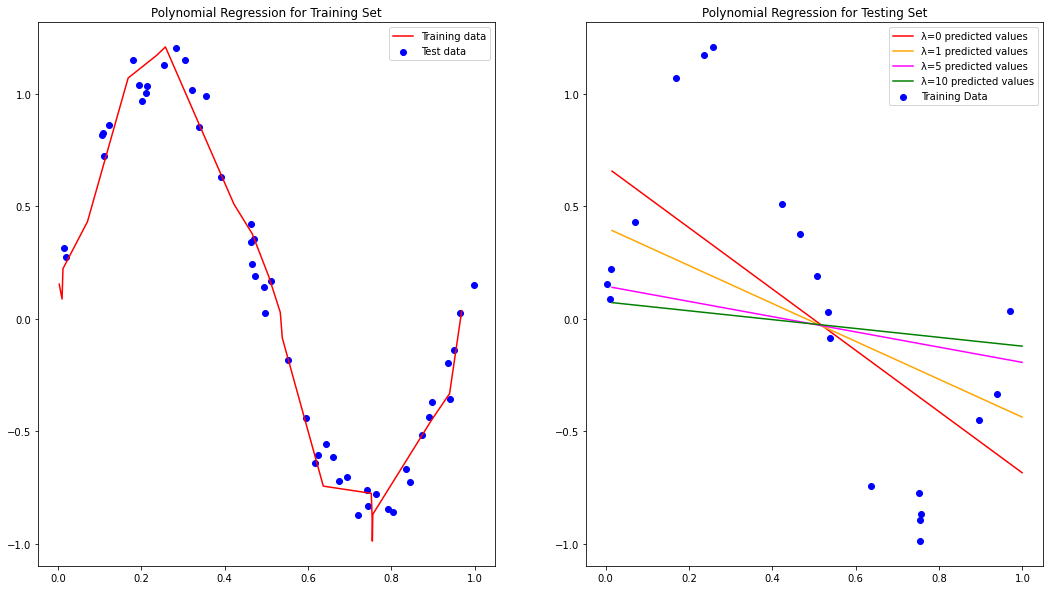

In [ ]:
# Plotting all the points to compare the regression graph

fig, axes = plt.subplots(1, 2, figsize=(18, 10))

df_train_sort = df_train.sort_values(by=['X_train'])
df_pred_sort_m1_0 = df_predicted_m1_0.sort_values(by=['X'])
df_pred_sort_m1_1 = df_predicted_m1_1.sort_values(by=['X'])
df_pred_sort_m1_5 = df_predicted_m1_5.sort_values(by=['X'])
df_pred_sort_m1_10 = df_predicted_m1_10.sort_values(by=['X'])

axes[0].plot(df_train_sort['X_train'], df_train_sort['Y_train'], color='red')
axes[0].scatter(df_test['X_test'], df_test['Y_test'], color='blue')
axes[0].legend(['Training data', 'Test data'])
axes[0].set_title('Polynomial Regression for Training Set')

axes[1].scatter(df_train['X_train'], df_train['Y_train'], color='blue')
axes[1].plot(df_pred_sort_m1_0['X'], df_pred_sort_m1_0['Y_predicted'], color='red')
axes[1].plot(df_pred_sort_m1_1['X'], df_pred_sort_m1_1['Y_predicted'], color='orange')
axes[1].plot(df_pred_sort_m1_5['X'], df_pred_sort_m1_5['Y_predicted'], color='magenta')
axes[1].plot(df_pred_sort_m1_10['X'], df_pred_sort_m1_10['Y_predicted'], color='green')
axes[1].legend(['λ=0 predicted values', 'λ=1 predicted values', 'λ=5 predicted values', 'λ=10 predicted values', 'Training Data'])
axes[1].set_title('Polynomial Regression for Testing Set')

#### Study the effect of regularization parameter λ on testing RMSE and flexibility of curve

##### λ = 0

In [ ]:
y_vs_y_hat_m1 = pd.DataFrame(data=(np.array(df_predicted_m1_0['Y_predicted']), Y_test),index=['y predicted m1 λ0','Y_train']).T
y_vs_y_hat_m1['sum of square error'] = (y_vs_y_hat_m1['y predicted m1 λ0'] - y_vs_y_hat_m1['Y_train'])**2

rmse_m1_λ0 = 0

rmse_m1_λ0 = y_vs_y_hat_m1['sum of square error'].sum() / len(y_vs_y_hat_m1)
rmse_m1_λ0 = math.sqrt(rmse_m1_λ0)
rmse_m1_λ0

0.47919331696942985

##### λ = 1

In [ ]:
y_vs_y_hat_m1 = pd.DataFrame(data=(np.array(df_predicted_m1_1['Y_predicted']), Y_test),index=['y predicted m1 λ1','Y_train']).T
y_vs_y_hat_m1['sum of square error'] = (y_vs_y_hat_m1['y predicted m1 λ1'] - y_vs_y_hat_m1['Y_train'])**2

rmse_m1_λ1 = 0

rmse_m1_λ1 = y_vs_y_hat_m1['sum of square error'].sum() / len(y_vs_y_hat_m1)
rmse_m1_λ1 = math.sqrt(rmse_m1_λ1)
rmse_m1_λ1

0.5452231185526227

##### λ = 5

In [ ]:
y_vs_y_hat_m1 = pd.DataFrame(data=(np.array(df_predicted_m1_5['Y_predicted']), Y_test),index=['y predicted m1 λ5','Y_train']).T
y_vs_y_hat_m1['sum of square error'] = (y_vs_y_hat_m1['y predicted m1 λ5'] - y_vs_y_hat_m1['Y_train'])**2

rmse_m1_λ5 = 0

rmse_m1_λ5 = y_vs_y_hat_m1['sum of square error'].sum() / len(y_vs_y_hat_m1)
rmse_m1_λ5 = math.sqrt(rmse_m1_λ5)
rmse_m1_λ5

0.635143525650125

##### λ = 10

In [ ]:
y_vs_y_hat_m1 = pd.DataFrame(data=(np.array(df_predicted_m1_10['Y_predicted']), Y_test),index=['y predicted m1 λ10','Y_train']).T
y_vs_y_hat_m1['sum of square error'] = (y_vs_y_hat_m1['y predicted m1 λ10'] - y_vs_y_hat_m1['Y_train'])**2

rmse_m1_λ10 = 0

rmse_m1_λ10 = y_vs_y_hat_m1['sum of square error'].sum() / len(y_vs_y_hat_m1)
rmse_m1_λ10 = math.sqrt(rmse_m1_λ10)
rmse_m1_λ10

0.6632510699535346

### For order m=2

#### List the value of coefficients of estimated regularized least squared polynomial regression models for each case.

In [ ]:
reg_LSP_ord_2_0 = np.array(regularized_LSPR(df_train['X_train'], df_train['Y_train'], 2, 0))
reg_LSP_ord_2_1 = np.array(regularized_LSPR(df_train['X_train'], df_train['Y_train'], 2, 1))
reg_LSP_ord_2_5 = np.array(regularized_LSPR(df_train['X_train'], df_train['Y_train'], 2, 5))
reg_LSP_ord_2_10 = np.array(regularized_LSPR(df_train['X_train'], df_train['Y_train'], 2, 10))

print(f'coefficient value with regularization and λ = 0: {reg_LSP_ord_2_0}')
print(f'coefficient value with regularization and λ = 1: {reg_LSP_ord_2_1}')
print(f'coefficient value with regularization and λ = 5: {reg_LSP_ord_2_5}')
print(f'coefficient value with regularization and λ = 10: {reg_LSP_ord_2_10}')

coefficient value with regularization and λ = 0: [[ 0.56084828 -0.40614083 -1.0359229 ]]
coefficient value with regularization and λ = 1: [[ 0.42380632 -0.49032625 -0.56779118]]
coefficient value with regularization and λ = 5: [[ 0.18555579 -0.25226579 -0.27565511]]
coefficient value with regularization and λ = 10: [[ 0.10145907 -0.15969676 -0.17128962]]


#### Obtain the prediction on testing set for regularized least squared
polynomial regression models for order M =1,2,3 and 9.

In [ ]:
y_predicted_m2_0, y_predicted_m2_1, y_predicted_m2_5, y_predicted_m2_10 = [], [], [] ,[]

for val in X:
  y_val = 0
  for deg in range(2, -1, -1):
    y_val += reg_LSP_ord_2_0[0][deg] * math.pow(val, deg)
  y_predicted_m2_0.append(y_val)

for val in X:
  y_val = 0
  for deg in range(2, -1, -1):
    y_val += reg_LSP_ord_2_1[0][deg] * math.pow(val, deg)
  y_predicted_m2_1.append(y_val)

for val in X:
  y_val = 0
  for deg in range(2, -1, -1):
    y_val += reg_LSP_ord_2_5[0][deg] * math.pow(val, deg)
  y_predicted_m2_5.append(y_val)

for val in X:
  y_val = 0
  for deg in range(2, -1, -1):
    y_val += reg_LSP_ord_2_10[0][deg] * math.pow(val, deg)
  y_predicted_m2_10.append(y_val)

df_predicted_m2_0 = pd.DataFrame(data=(X, y_predicted_m2_0),index=['X', 'Y_predicted']).T
df_predicted_m2_1 = pd.DataFrame(data=(X, y_predicted_m2_1),index=['X', 'Y_predicted']).T
df_predicted_m2_5 = pd.DataFrame(data=(X, y_predicted_m2_5),index=['X', 'Y_predicted']).T
df_predicted_m2_10 = pd.DataFrame(data=(X, y_predicted_m2_10),index=['X', 'Y_predicted']).T

#### Plot the estimate obtained by regularized least squared polynomial regression models for training set along with $y_{1}$, $y_{2}$, $y_{3}$, ..., $y_{20}$ AND for testing set along with $y'_{1}$, $y'_{2}$, $y'_{3}$, ..., $y'_{50}$

Text(0.5, 1.0, 'Polynomial Regression for Testing Set')

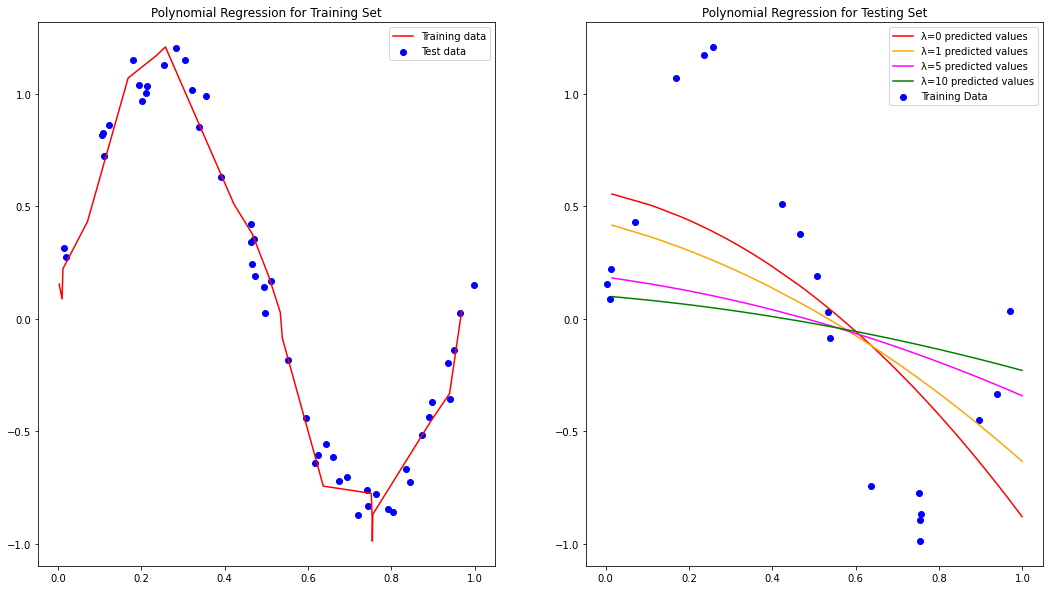

In [ ]:
# Plotting all the points to compare the regression graph

fig, axes = plt.subplots(1, 2, figsize=(18, 10))

df_train_sort = df_train.sort_values(by=['X_train'])
df_pred_sort_m2_0 = df_predicted_m2_0.sort_values(by=['X'])
df_pred_sort_m2_1 = df_predicted_m2_1.sort_values(by=['X'])
df_pred_sort_m2_5 = df_predicted_m2_5.sort_values(by=['X'])
df_pred_sort_m2_10 = df_predicted_m2_10.sort_values(by=['X'])

axes[0].plot(df_train_sort['X_train'], df_train_sort['Y_train'], color='red')
axes[0].scatter(df_test['X_test'], df_test['Y_test'], color='blue')
axes[0].legend(['Training data', 'Test data'])
axes[0].set_title('Polynomial Regression for Training Set')

axes[1].scatter(df_train['X_train'], df_train['Y_train'], color='blue')
axes[1].plot(df_pred_sort_m2_0['X'], df_pred_sort_m2_0['Y_predicted'], color='red')
axes[1].plot(df_pred_sort_m2_1['X'], df_pred_sort_m2_1['Y_predicted'], color='orange')
axes[1].plot(df_pred_sort_m2_5['X'], df_pred_sort_m2_5['Y_predicted'], color='magenta')
axes[1].plot(df_pred_sort_m2_10['X'], df_pred_sort_m2_10['Y_predicted'], color='green')
axes[1].legend(['λ=0 predicted values', 'λ=1 predicted values', 'λ=5 predicted values', 'λ=10 predicted values', 'Training Data'])
axes[1].set_title('Polynomial Regression for Testing Set')

#### Study the effect of regularization parameter λ on testing RMSE and flexibility of curve

##### λ = 0

In [ ]:
y_vs_y_hat_m2 = pd.DataFrame(data=(np.array(df_predicted_m2_0['Y_predicted']), Y_test),index=['y predicted m2 λ0','Y_train']).T
y_vs_y_hat_m2['sum of square error'] = (y_vs_y_hat_m2['y predicted m2 λ0'] - y_vs_y_hat_m2['Y_train'])**2

rmse_m2_λ0 = 0

rmse_m2_λ0 = y_vs_y_hat_m2['sum of square error'].sum() / len(y_vs_y_hat_m2)
rmse_m2_λ0 = math.sqrt(rmse_m2_λ0)
rmse_m2_λ0

0.48282981986444684

##### λ = 1

In [ ]:
y_vs_y_hat_m2 = pd.DataFrame(data=(np.array(df_predicted_m2_1['Y_predicted']), Y_test),index=['y predicted m2 λ1','Y_train']).T
y_vs_y_hat_m2['sum of square error'] = (y_vs_y_hat_m2['y predicted m2 λ1'] - y_vs_y_hat_m2['Y_train'])**2

rmse_m2_λ1 = 0

rmse_m2_λ1 = y_vs_y_hat_m2['sum of square error'].sum() / len(y_vs_y_hat_m2)
rmse_m2_λ1 = math.sqrt(rmse_m2_λ1)
rmse_m2_λ1

0.5186112720182233

##### λ = 5

In [ ]:
y_vs_y_hat_m2 = pd.DataFrame(data=(np.array(df_predicted_m2_5['Y_predicted']), Y_test),index=['y predicted m2 λ5','Y_train']).T
y_vs_y_hat_m2['sum of square error'] = (y_vs_y_hat_m2['y predicted m2 λ5'] - y_vs_y_hat_m2['Y_train'])**2

rmse_m2_λ5 = 0

rmse_m2_λ5 = y_vs_y_hat_m2['sum of square error'].sum() / len(y_vs_y_hat_m2)
rmse_m2_λ5 = math.sqrt(rmse_m2_λ5)
rmse_m2_λ5

0.6028233788433187

##### λ = 10

In [ ]:
y_vs_y_hat_m2 = pd.DataFrame(data=(np.array(df_predicted_m2_10['Y_predicted']), Y_test),index=['y predicted m2 λ10','Y_train']).T
y_vs_y_hat_m2['sum of square error'] = (y_vs_y_hat_m2['y predicted m2 λ10'] - y_vs_y_hat_m2['Y_train'])**2

rmse_m2_λ10 = 0

rmse_m2_λ10 = y_vs_y_hat_m2['sum of square error'].sum() / len(y_vs_y_hat_m2)
rmse_m2_λ10 = math.sqrt(rmse_m2_λ0)
rmse_m2_λ10

0.694859568448508

### For order m=3

#### List the value of coefficients of estimated regularized least squared polynomial regression models for each case.

In [ ]:
reg_LSP_ord_3_0 = np.array(regularized_LSPR(df_train['X_train'], df_train['Y_train'], 3, 0))
reg_LSP_ord_3_1 = np.array(regularized_LSPR(df_train['X_train'], df_train['Y_train'], 3, 1))
reg_LSP_ord_3_5 = np.array(regularized_LSPR(df_train['X_train'], df_train['Y_train'], 3, 5))
reg_LSP_ord_3_10 = np.array(regularized_LSPR(df_train['X_train'], df_train['Y_train'], 3, 10))

print(f'coefficient value with regularization and λ = 0: {reg_LSP_ord_3_0}')
print(f'coefficient value with regularization and λ = 1: {reg_LSP_ord_3_1}')
print(f'coefficient value with regularization and λ = 5: {reg_LSP_ord_3_5}')
print(f'coefficient value with regularization and λ = 10: {reg_LSP_ord_3_10}')

coefficient value with regularization and λ = 0: [[-1.85385787e-03  1.18606440e+01 -3.48893843e+01  2.33858947e+01]]
coefficient value with regularization and λ = 1: [[ 0.41886098 -0.42102519 -0.46679057 -0.24443248]]
coefficient value with regularization and λ = 5: [[ 0.19833252 -0.2153815  -0.2364681  -0.18459074]]
coefficient value with regularization and λ = 10: [[ 0.11257081 -0.14112644 -0.15305376 -0.12489025]]


#### Obtain the prediction on testing set for regularized least squared
polynomial regression models for order M =1,2,3 and 9.

In [ ]:
y_predicted_m3_0, y_predicted_m3_1, y_predicted_m3_5, y_predicted_m3_10 = [], [], [] ,[]

for val in X:
  y_val = 0
  for deg in range(3, -1, -1):
    y_val += reg_LSP_ord_3_0[0][deg] * math.pow(val, deg)
  y_predicted_m3_0.append(y_val)

for val in X:
  y_val = 0
  for deg in range(3, -1, -1):
    y_val += reg_LSP_ord_3_1[0][deg] * math.pow(val, deg)
  y_predicted_m3_1.append(y_val)

for val in X:
  y_val = 0
  for deg in range(3, -1, -1):
    y_val += reg_LSP_ord_3_5[0][deg] * math.pow(val, deg)
  y_predicted_m3_5.append(y_val)

for val in X:
  y_val = 0
  for deg in range(3, -1, -1):
    y_val += reg_LSP_ord_3_10[0][deg] * math.pow(val, deg)
  y_predicted_m3_10.append(y_val)

df_predicted_m3_0 = pd.DataFrame(data=(X, y_predicted_m3_0),index=['X', 'Y_predicted']).T
df_predicted_m3_1 = pd.DataFrame(data=(X, y_predicted_m3_1),index=['X', 'Y_predicted']).T
df_predicted_m3_5 = pd.DataFrame(data=(X, y_predicted_m3_5),index=['X', 'Y_predicted']).T
df_predicted_m3_10 = pd.DataFrame(data=(X, y_predicted_m3_10),index=['X', 'Y_predicted']).T

#### Plot the estimate obtained by regularized least squared polynomial regression models for training set along with $y_{1}$, $y_{2}$, $y_{3}$, ..., $y_{20}$ AND for testing set along with $y'_{1}$, $y'_{2}$, $y'_{3}$, ..., $y'_{50}$

Text(0.5, 1.0, 'Polynomial Regression for Testing Set')

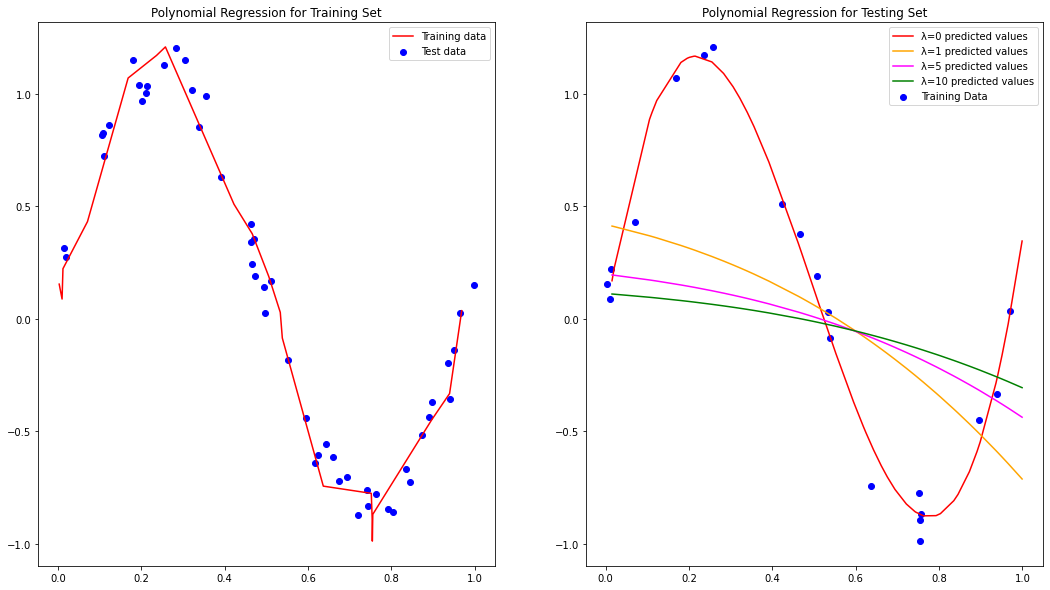

In [ ]:
# Plotting all the points to compare the regression graph

fig, axes = plt.subplots(1, 2, figsize=(18, 10))

df_train_sort = df_train.sort_values(by=['X_train'])
df_pred_sort_m3_0 = df_predicted_m3_0.sort_values(by=['X'])
df_pred_sort_m3_1 = df_predicted_m3_1.sort_values(by=['X'])
df_pred_sort_m3_5 = df_predicted_m3_5.sort_values(by=['X'])
df_pred_sort_m3_10 = df_predicted_m3_10.sort_values(by=['X'])

axes[0].plot(df_train_sort['X_train'], df_train_sort['Y_train'], color='red')
axes[0].scatter(df_test['X_test'], df_test['Y_test'], color='blue')
axes[0].legend(['Training data', 'Test data'])
axes[0].set_title('Polynomial Regression for Training Set')

axes[1].scatter(df_train['X_train'], df_train['Y_train'], color='blue')
axes[1].plot(df_pred_sort_m3_0['X'], df_pred_sort_m3_0['Y_predicted'], color='red')
axes[1].plot(df_pred_sort_m3_1['X'], df_pred_sort_m3_1['Y_predicted'], color='orange')
axes[1].plot(df_pred_sort_m3_5['X'], df_pred_sort_m3_5['Y_predicted'], color='magenta')
axes[1].plot(df_pred_sort_m3_10['X'], df_pred_sort_m3_10['Y_predicted'], color='green')
axes[1].legend(['λ=0 predicted values', 'λ=1 predicted values', 'λ=5 predicted values', 'λ=10 predicted values', 'Training Data'])
axes[1].set_title('Polynomial Regression for Testing Set')

#### Study the effect of regularization parameter λ on testing RMSE and flexibility of curve

##### λ = 0

In [ ]:
y_vs_y_hat_m3 = pd.DataFrame(data=(np.array(df_predicted_m3_0['Y_predicted']), Y_test),index=['y predicted m3 λ0','Y_train']).T
y_vs_y_hat_m3['sum of square error'] = (y_vs_y_hat_m3['y predicted m3 λ0'] - y_vs_y_hat_m3['Y_train'])**2

rmse_m3_λ0 = 0

rmse_m3_λ0 = y_vs_y_hat_m3['sum of square error'].sum() / len(y_vs_y_hat_m3)
rmse_m3_λ0 = math.sqrt(rmse_m3_λ0)
rmse_m3_λ0

0.10210609292605462

##### λ = 1

In [ ]:
y_vs_y_hat_m3 = pd.DataFrame(data=(np.array(df_predicted_m3_1['Y_predicted']), Y_test),index=['y predicted m3 λ1','Y_train']).T
y_vs_y_hat_m3['sum of square error'] = (y_vs_y_hat_m3['y predicted m3 λ1'] - y_vs_y_hat_m3['Y_train'])**2

rmse_m3_λ1 = 0

rmse_m3_λ1 = y_vs_y_hat_m3['sum of square error'].sum() / len(y_vs_y_hat_m3)
rmse_m3_λ1 = math.sqrt(rmse_m3_λ1)
rmse_m3_λ1

0.5194974046822679

##### λ = 5

In [ ]:
y_vs_y_hat_m3 = pd.DataFrame(data=(np.array(df_predicted_m3_5['Y_predicted']), Y_test),index=['y predicted m3 λ5','Y_train']).T
y_vs_y_hat_m3['sum of square error'] = (y_vs_y_hat_m3['y predicted m3 λ5'] - y_vs_y_hat_m3['Y_train'])**2

rmse_m3_λ5 = 0

rmse_m3_λ5 = y_vs_y_hat_m3['sum of square error'].sum() / len(y_vs_y_hat_m3)
rmse_m3_λ5 = math.sqrt(rmse_m3_λ5)
rmse_m3_λ5

0.5918468216630512

##### λ = 10

In [ ]:
y_vs_y_hat_m3 = pd.DataFrame(data=(np.array(df_predicted_m3_10['Y_predicted']), Y_test),index=['y predicted m3 λ10','Y_train']).T
y_vs_y_hat_m3['sum of square error'] = (y_vs_y_hat_m3['y predicted m3 λ10'] - y_vs_y_hat_m3['Y_train'])**2

rmse_m3_λ10 = 0

rmse_m3_λ10 = y_vs_y_hat_m3['sum of square error'].sum() / len(y_vs_y_hat_m3)
rmse_m3_λ10 = math.sqrt(rmse_m3_λ10)
rmse_m3_λ10

0.6288167566762468

### For order m=9

#### List the value of coefficients of estimated regularized least squared polynomial regression models for each case.

In [ ]:
reg_LSP_ord_9_0 = np.array(regularized_LSPR(df_train['X_train'], df_train['Y_train'], 9, 0))
reg_LSP_ord_9_01 = np.array(regularized_LSPR(df_train['X_train'], df_train['Y_train'], 9, 0.01))
reg_LSP_ord_9_001 = np.array(regularized_LSPR(df_train['X_train'], df_train['Y_train'], 9, 0.001))
reg_LSP_ord_9_0001 = np.array(regularized_LSPR(df_train['X_train'], df_train['Y_train'], 9, 0.0001))

print(f'coefficient value with regularization and λ = 0: {reg_LSP_ord_9_0}')
print(f'coefficient value with regularization and λ = 1: {reg_LSP_ord_9_01}')
print(f'coefficient value with regularization and λ = 5: {reg_LSP_ord_9_001}')
print(f'coefficient value with regularization and λ = 10: {reg_LSP_ord_9_0001}')

coefficient value with regularization and λ = 0: [[ 1.40696342e-01  1.38594483e+00  2.04955549e+01  6.06173024e+02
  -6.73946963e+03  2.76898301e+04 -5.88975234e+04  6.89580748e+04
  -4.21384600e+04  1.05008219e+04]]
coefficient value with regularization and λ = 1: [[ 0.35833666  3.00932533 -5.06533381 -3.1245987  -0.63367681  0.87107449
   1.50734589  1.58518319  1.34482795  0.94158161]]
coefficient value with regularization and λ = 5: [[  0.15429355   6.77685799 -12.78486603  -4.3679058    2.77355979
    5.21629234   4.49723254   2.21391193  -0.62540207  -3.47450788]]
coefficient value with regularization and λ = 10: [[  0.06599743   8.67072275 -17.08772153  -5.18992214   5.92620069
    8.16907538   5.27551653   1.02591244  -2.45605363  -4.2722014 ]]


#### Obtain the prediction on testing set for regularized least squared
polynomial regression models for order M =1,2,3 and 9.

In [ ]:
y_predicted_m9_0, y_predicted_m9_01, y_predicted_m9_001, y_predicted_m9_0001 = [], [], [] ,[]

for val in X:
  y_val = 0
  for deg in range(9, -1, -1):
    y_val += reg_LSP_ord_9_0[0][deg] * math.pow(val, deg)
  y_predicted_m9_0.append(y_val)

for val in X:
  y_val = 0
  for deg in range(9, -1, -1):
    y_val += reg_LSP_ord_9_01[0][deg] * math.pow(val, deg)
  y_predicted_m9_01.append(y_val)

for val in X:
  y_val = 0
  for deg in range(9, -1, -1):
    y_val += reg_LSP_ord_9_001[0][deg] * math.pow(val, deg)
  y_predicted_m9_001.append(y_val)

for val in X:
  y_val = 0
  for deg in range(9, -1, -1):
    y_val += reg_LSP_ord_9_0001[0][deg] * math.pow(val, deg)
  y_predicted_m9_0001.append(y_val)

df_predicted_m9_0 = pd.DataFrame(data=(X, y_predicted_m9_0),index=['X', 'Y_predicted']).T
df_predicted_m9_01 = pd.DataFrame(data=(X, y_predicted_m9_01),index=['X', 'Y_predicted']).T
df_predicted_m9_001 = pd.DataFrame(data=(X, y_predicted_m9_001),index=['X', 'Y_predicted']).T
df_predicted_m9_0001 = pd.DataFrame(data=(X, y_predicted_m9_0001),index=['X', 'Y_predicted']).T

#### Plot the estimate obtained by regularized least squared polynomial regression models for training set along with $y_{1}$, $y_{2}$, $y_{3}$, ..., $y_{20}$ AND for testing set along with $y'_{1}$, $y'_{2}$, $y'_{3}$, ..., $y'_{50}$

Text(0.5, 1.0, 'Polynomial Regression for Testing Set')

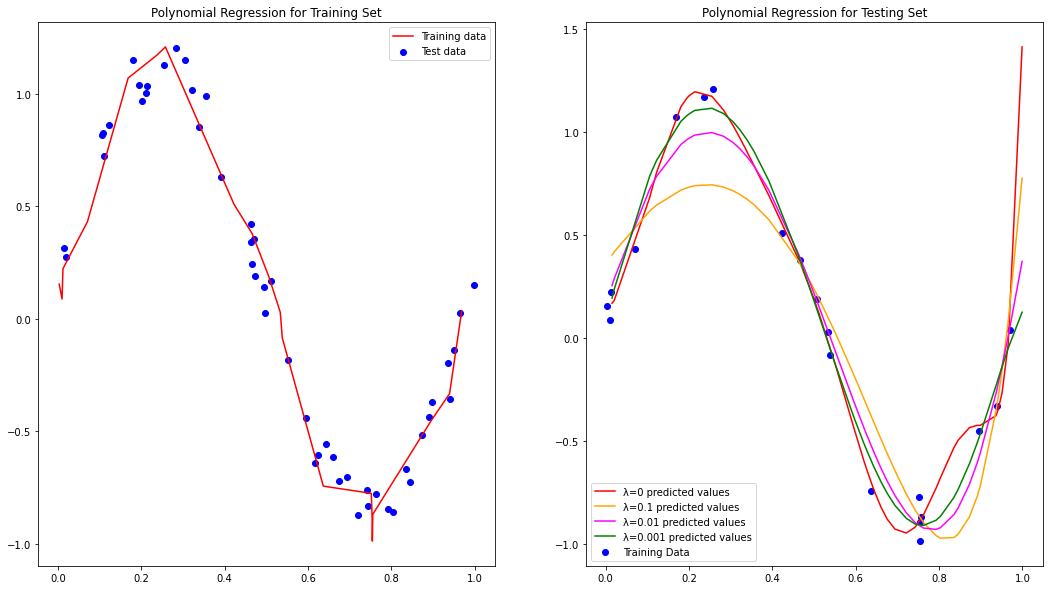

In [ ]:
# Plotting all the points to compare the regression graph

fig, axes = plt.subplots(1, 2, figsize=(18, 10))

df_train_sort = df_train.sort_values(by=['X_train'])
df_pred_sort_m9_0 = df_predicted_m9_0.sort_values(by=['X'])
df_pred_sort_m9_01 = df_predicted_m9_01.sort_values(by=['X'])
df_pred_sort_m9_001 = df_predicted_m9_001.sort_values(by=['X'])
df_pred_sort_m9_0001 = df_predicted_m9_0001.sort_values(by=['X'])

axes[0].plot(df_train_sort['X_train'], df_train_sort['Y_train'], color='red')
axes[0].scatter(df_test['X_test'], df_test['Y_test'], color='blue')
axes[0].legend(['Training data', 'Test data'])
axes[0].set_title('Polynomial Regression for Training Set')

axes[1].scatter(df_train['X_train'], df_train['Y_train'], color='blue')
axes[1].plot(df_pred_sort_m9_0['X'], df_pred_sort_m9_0['Y_predicted'], color='red')
axes[1].plot(df_pred_sort_m9_01['X'], df_pred_sort_m9_01['Y_predicted'], color='orange')
axes[1].plot(df_pred_sort_m9_001['X'], df_pred_sort_m9_001['Y_predicted'], color='magenta')
axes[1].plot(df_pred_sort_m9_0001['X'], df_pred_sort_m9_0001['Y_predicted'], color='green')
axes[1].legend(['λ=0 predicted values', 'λ=0.1 predicted values', 'λ=0.01 predicted values', 'λ=0.001 predicted values', 'Training Data'])
axes[1].set_title('Polynomial Regression for Testing Set')

#### Study the effect of regularization parameter λ on testing RMSE and flexibility of curve

##### λ = 0

In [404]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_0['Y_predicted']), Y_test),index=['y predicted m9 λ0','Y_train']).T
y_vs_y_hat_m9['sum of square error'] = (y_vs_y_hat_m9['y predicted m9 λ0'] - y_vs_y_hat_m9['Y_train'])**2

rmse_m9_λ0 = 0

rmse_m9_λ0 = y_vs_y_hat_m9['sum of square error'].sum() / len(y_vs_y_hat_m9)
rmse_m9_λ0 = math.sqrt(rmse_m9_λ0)
rmse_m9_λ0

1.1147797838620428

##### λ = 0.01

In [403]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_01['Y_predicted']), Y_test),index=['y predicted m9 λ0.01','Y_train']).T
y_vs_y_hat_m9['sum of square error'] = (y_vs_y_hat_m9['y predicted m9 λ0.01'] - y_vs_y_hat_m9['Y_train'])**2

rmse_m9_λ01 = 0

rmse_m9_λ01 = y_vs_y_hat_m9['sum of square error'].sum() / len(y_vs_y_hat_m9)
rmse_m9_λ01 = math.sqrt(rmse_m9_λ01)
rmse_m9_λ01

1.0326118299613953

##### λ = 0.001

In [402]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_001['Y_predicted']), Y_test),index=['y predicted m9 λ0.001','Y_train']).T
y_vs_y_hat_m9['sum of square error'] = (y_vs_y_hat_m9['y predicted m9 λ0.001'] - y_vs_y_hat_m9['Y_train'])**2

rmse_m9_λ001 = 0

rmse_m9_λ001 = y_vs_y_hat_m9['sum of square error'].sum() / len(y_vs_y_hat_m9)
rmse_m9_λ001 = math.sqrt(rmse_m9_λ001)
rmse_m9_λ001

1.0822620061646986

##### λ = 0.0001

In [401]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_0001['Y_predicted']), Y_test),index=['y predicted m9 λ0.0001','Y_train']).T
y_vs_y_hat_m9['sum of square error'] = (y_vs_y_hat_m9['y predicted m9 λ0.0001'] - y_vs_y_hat_m9['Y_train'])**2

rmse_m9_λ0001 = 0

rmse_m9_λ0001 = y_vs_y_hat_m9['sum of square error'].sum() / len(y_vs_y_hat_m9)
rmse_m9_λ0001 = math.sqrt(rmse_m9_λ0001)
rmse_m9_λ0001

1.1038970224718876

## ANALYSIS
λ
### λ plays a very crutial role when dealing with higher degree plynomial regressions.

### 1. As we observe for M=1,
###we obtain a straight line trying to fit a curve, which is not possible. So, even if we try to fix the value of coefficients by using λ, we cannot achieve anything here as it is a clear case of "underfitting".

### For M=2,
###we can see that we are getting a curved line, but it is still a underfitting line sice we cannot fix all the points available in trainign set.

### For M=3,
###we notice that we are starting to get a curve that is fitting our test points correctly. and when we provide λ= 0, 1, 5 10 we can see variations in the graph.

### **λ=0 is a special case where we are not applying any "regularization" because the expression**
### **$({X^{T}} X+λ.I )^{-1}$ . $X^{T}.Y$ becomes same as $({X^{T}} X)^{-1}$ . $X^{T}.Y$ when we put λ=0**

### Same can be observed for M=3. We get an almost perfect curve that fits all of our data points, but as we increase the value of λ = 1, 5 10, we see that the graphs tend to underfit propotional the increase in value of λ

### For M=9,
###since the polynomial is of very much higher degree, minute changes in the value of λ results in noticable changes in the curve.

### Here, we have plotted the graph for λ= 0, 0.01, 0.001, 0.0001 and we can clearly see that as we are decreasing the value of λ, we can clearly see the changes in the curve that we get. For λ= 0.001, we notice that we get a curve that is not trying to "overfit" the curve but is good enough to capture all the points.

### The same can be observed in the RMSE values obtained for λ= 0, 0.001, 0.001, 0.0001, i.e, 1.1147797838620428, 1.0326118299613953, 1.0822620061646986, 1.1038970224718876 . As we decrease the value of λ, we notice that our RMSE error is also reducing with reducing values of λ.

# BIVARIATE CASE

### M=1: Y = $β_{0}$ + $β_{1}$$x_{1}$ + $β_{2}$$x_{2}$
### M=2: Y = $β_{0}$ + $β_{1}$$x_{1}$ + $β_{2}$$x_{2}$ + $β_{11}$$x_{1}^{2}$ + $β_{22}$$x_{2}^{2}$ + $β_{12}$${x_{1}}$$x_{2}$
### M=5: Y = $β_{0}$ + $β_{1}$$x_{1}$ + $β_{2}$$x_{2}$ + $β_{3}$$x_{3}$ + $β_{4}$$x_{4}$ +$β_{5}$$x_{5}$ + $β_{11}$$x_{1}^{2}$ + $β_{22}$$x_{2}^{2}$ + $β_{33}$$x_{3}^{2}$ + $β_{44}$$x_{4}^{4}$ + $β_{55}$$x_{5}^{2}$ + ...

## A. Construct the training set T = { ($x_{1}$, $y_{1}$), ($x_{2}$, $y_{2}$), ... , ($x_{20}$, $y_{20}$)} using the relation :

##$Y_{i}$  = sin(2 π ||$x_{i}$||) + $ε_{i}$ where $ε_{i}$ ~ N(0,0.25) and $x_{i}^1$, $x_{i}^2$ are from U[0, 1].


##In the similar way construct a testing set of size 50
## i,e. Test = {($x_{1}$, $y_{1}$), ($x_{2}$, $y_{2}$), ... , ($x_{50}$, $y_{50}$)}}

In [ ]:
# TRAINING DATA
X_train = []
Y_train =[]

X1_train=np.random.uniform(0,1,20)
X2_train=np.random.uniform(0,1,20)
x_vector_train = pd.DataFrame(data=(X1_train, X2_train),index=['x1','x2']).T

for x_val in zip(X1_train, X2_train):
  res = math.sqrt((x_val[0]**2) + (x_val[1]**2))
  X_train.append(res)

for x_val in X_train:
    Yi = math.sin(2 * math.pi * x_val) + np.random.uniform(0, 0.25) 
    Y_train.append(Yi)

# For better understanding, let's convert X and Y training dataset into a dataframe
df_train = pd.DataFrame(data=(X_train,Y_train),index=['X_train','Y_train']).T
df_train

,X_train,Y_train
0,0.583527,-0.357850
1,0.946572,-0.285508
2,1.093519,0.647576
3,0.654896,-0.735139
4,0.790370,-0.824471
5,0.959668,-0.222461
6,0.870853,-0.548613
7,0.908481,-0.341865
8,0.370129,0.947247
9,0.763137,-0.764588


In [ ]:
# TESTING DATA
X_test = []
Y_test =[]

X1_test=np.random.uniform(0,1,50)
X2_test=np.random.uniform(0,1,50)
x_vector_test = pd.DataFrame(data=(X1_test, X2_test),index=['x1','x2']).T

for x_val in zip(X1_test, X2_test):
  res = math.sqrt((x_val[0]**2) + (x_val[1]**2))
  X_test.append(res)

for x_val in X_test:
    Yi = math.sin(2 * math.pi * x_val) + np.random.uniform(0, 0.25) 
    Y_test.append(Yi)

# For better understanding, let's convert X and Y training dataset into a dataframe
df_test = pd.DataFrame(data=(X_test,Y_test),index=['X_test','Y_test']).T
df_test

,X_test,Y_test
0,0.928138,-0.274562
1,0.680636,-0.813494
2,0.820519,-0.719305
3,0.375982,0.790582
4,0.938749,-0.137318
5,1.186384,1.107415
6,0.534292,-0.072826
7,1.297877,1.005735
8,0.984289,0.019543
9,1.140342,0.800222


## B) Obtain the prediction on testing set and compute the RMSE for regularized least squared polynomial regression models for order M =1, 2 and 5 . Also plot the estimated function and target function for the training set and testing set.

In [ ]:
# Least Square Polynomial Regression
def regularized_LSPR(vector_x, y_dataset, degree, Lambda):
  no_of_rows = len(vector_x)
  no_of_cols = int( ((degree+1)*((degree+1)+1))/2 )

  # finding the X matrix
  # initialize X matrix with 0 initially
  X = np.zeros((no_of_rows, no_of_cols))
  lam_I = np.identity(no_of_cols)*Lambda
  for row in range (no_of_rows):
    X[row][0] = 1
    M = 1
    n = M
    for col in range(1, no_of_cols):
      # Logic x1^(n) * x2^(M-n)
      result = math.pow((vector_x['x1'].iloc[row]), n) * math.pow(vector_x['x2'].iloc[row], M-n)
      X[row][col] = result
      n -= 1

      if n < 0:
        M += 1
        n = M
      if M > degree:
        break

  # calculating ((X^T.X + λI)^(−1)) . X^T . Y
  X_Trans_X = np.matrix((np.dot(X.T, X)))
  X_Trans_X = np.add(X_Trans_X, lam_I)
  X_Trans_X_Inv = X_Trans_X.I
  temp = np.matrix(np.dot(X_Trans_X_Inv, X.T))
  return np.dot(temp, y_dataset.values)



reg_LSP_ord_1_0 = np.array(regularized_LSPR(x_vector_train, df_train['Y_train'], 1, 0))
reg_LSP_ord_1_1 = np.array(regularized_LSPR(x_vector_train, df_train['Y_train'], 1, 1))
reg_LSP_ord_1_5= np.array(regularized_LSPR(x_vector_train, df_train['Y_train'], 1, 5))
reg_LSP_ord_1_10= np.array(regularized_LSPR(x_vector_train, df_train['Y_train'], 1, 10))

reg_LSP_ord_2_0 = np.array(regularized_LSPR(x_vector_train, df_train['Y_train'], 2, 0))
reg_LSP_ord_2_1 = np.array(regularized_LSPR(x_vector_train, df_train['Y_train'], 2, 1))
reg_LSP_ord_2_5= np.array(regularized_LSPR(x_vector_train, df_train['Y_train'], 2, 5))
reg_LSP_ord_2_10= np.array(regularized_LSPR(x_vector_train, df_train['Y_train'], 2, 10))

reg_LSP_ord_5_0 = np.array(regularized_LSPR(x_vector_train, df_train['Y_train'], 5, 0))
reg_LSP_ord_5_01 = np.array(regularized_LSPR(x_vector_train, df_train['Y_train'], 5, 0.01))
reg_LSP_ord_5_001= np.array(regularized_LSPR(x_vector_train, df_train['Y_train'], 5, 0.001))
reg_LSP_ord_5_1= np.array(regularized_LSPR(x_vector_train, df_train['Y_train'], 5, 1))

### Order M = 1


In [ ]:
X = np.array(df_test['X_test'])
y_predicted_m1_0, y_predicted_m1_1, y_predicted_m1_5, y_predicted_m1_10 = [], [], [] ,[]

for val in X:
  y_val = 0
  for deg in range(1, -1, -1):
    y_val += reg_LSP_ord_1_0[0][deg] * math.pow(val, deg)
  y_predicted_m1_0.append(y_val)

for val in X:
  y_val = 0
  for deg in range(1, -1, -1):
    y_val += reg_LSP_ord_1_1[0][deg] * math.pow(val, deg)
  y_predicted_m1_1.append(y_val)

for val in X:
  y_val = 0
  for deg in range(1, -1, -1):
    y_val += reg_LSP_ord_1_5[0][deg] * math.pow(val, deg)
  y_predicted_m1_5.append(y_val)

for val in X:
  y_val = 0
  for deg in range(1, -1, -1):
    y_val += reg_LSP_ord_1_10[0][deg] * math.pow(val, deg)
  y_predicted_m1_10.append(y_val)

df_predicted_m1_0 = pd.DataFrame(data=(X, y_predicted_m1_0),index=['X', 'Y_predicted']).T
df_predicted_m1_1 = pd.DataFrame(data=(X, y_predicted_m1_1),index=['X', 'Y_predicted']).T
df_predicted_m1_5 = pd.DataFrame(data=(X, y_predicted_m1_5),index=['X', 'Y_predicted']).T
df_predicted_m1_10 = pd.DataFrame(data=(X, y_predicted_m1_10),index=['X', 'Y_predicted']).T

Text(0.5, 1.0, 'Polynomial Regression for Testing Set')

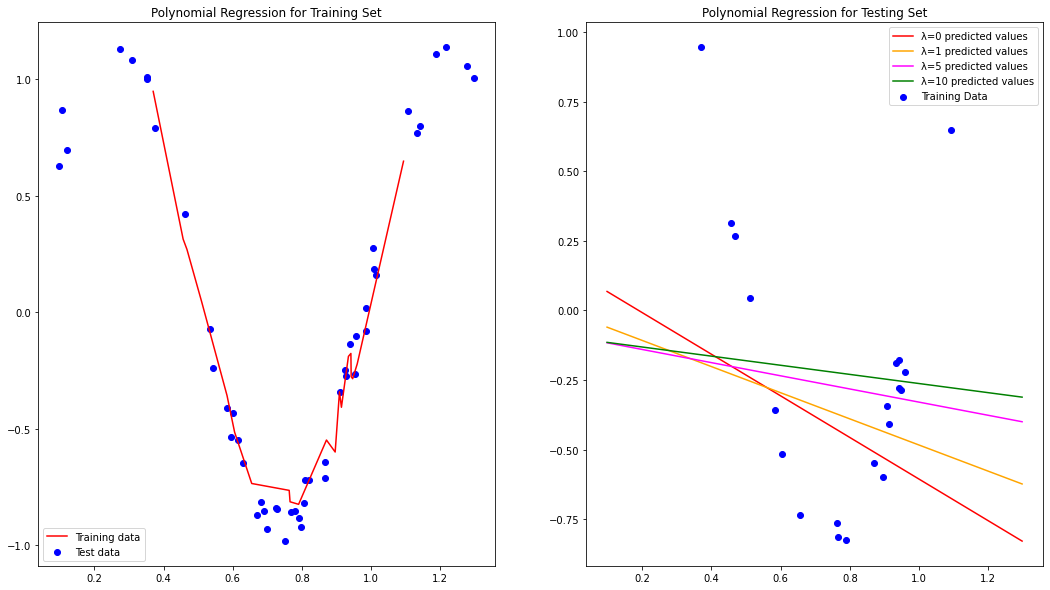

In [ ]:
# Plotting all the points to compare the regression graph

fig, axes = plt.subplots(1, 2, figsize=(18, 10))

df_train_sort = df_train.sort_values(by=['X_train'])
df_pred_sort_m1_0 = df_predicted_m1_0.sort_values(by=['X'])
df_pred_sort_m1_1 = df_predicted_m1_1.sort_values(by=['X'])
df_pred_sort_m1_5 = df_predicted_m1_5.sort_values(by=['X'])
df_pred_sort_m1_10 = df_predicted_m1_10.sort_values(by=['X'])

axes[0].plot(df_train_sort['X_train'], df_train_sort['Y_train'], color='red')
axes[0].scatter(df_test['X_test'], df_test['Y_test'], color='blue')
axes[0].legend(['Training data', 'Test data'])
axes[0].set_title('Polynomial Regression for Training Set')

axes[1].scatter(df_train['X_train'], df_train['Y_train'], color='blue')
axes[1].plot(df_pred_sort_m1_0['X'], df_pred_sort_m1_0['Y_predicted'], color='red')
axes[1].plot(df_pred_sort_m1_1['X'], df_pred_sort_m1_1['Y_predicted'], color='orange')
axes[1].plot(df_pred_sort_m1_5['X'], df_pred_sort_m1_5['Y_predicted'], color='magenta')
axes[1].plot(df_pred_sort_m1_10['X'], df_pred_sort_m1_10['Y_predicted'], color='green')
axes[1].legend(['λ=0 predicted values', 'λ=1 predicted values', 'λ=5 predicted values', 'λ=10 predicted values', 'Training Data'])
axes[1].set_title('Polynomial Regression for Testing Set')

#### RMSE for λ = 0, 1, 5, 10

In [ ]:
# λ = 0
y_vs_y_hat_m1 = pd.DataFrame(data=(np.array(df_predicted_m1_0['Y_predicted']), Y_test),index=['y predicted m1 λ0','Y_train']).T
y_vs_y_hat_m1['sum of square error'] = (y_vs_y_hat_m1['y predicted m1 λ0'] - y_vs_y_hat_m1['Y_train'])**2

rmse_m1_λ0 = 0

rmse_m1_λ0 = y_vs_y_hat_m1['sum of square error'].sum() / len(y_vs_y_hat_m1)
rmse_m1_λ0 = math.sqrt(rmse_m1_λ0)
rmse_m1_λ0

0.8383313507612224

In [ ]:
# λ = 1
y_vs_y_hat_m1 = pd.DataFrame(data=(np.array(df_predicted_m1_1['Y_predicted']), Y_test),index=['y predicted m1 λ1','Y_train']).T
y_vs_y_hat_m1['sum of square error'] = (y_vs_y_hat_m1['y predicted m1 λ1'] - y_vs_y_hat_m1['Y_train'])**2

rmse_m1_λ1 = 0

rmse_m1_λ1 = y_vs_y_hat_m1['sum of square error'].sum() / len(y_vs_y_hat_m1)
rmse_m1_λ1 = math.sqrt(rmse_m1_λ1)
rmse_m1_λ1

0.800221181424874

In [ ]:
# λ = 5
y_vs_y_hat_m1 = pd.DataFrame(data=(np.array(df_predicted_m1_5['Y_predicted']), Y_test),index=['y predicted m1 λ5','Y_train']).T
y_vs_y_hat_m1['sum of square error'] = (y_vs_y_hat_m1['y predicted m1 λ5'] - y_vs_y_hat_m1['Y_train'])**2

rmse_m1_λ5 = 0

rmse_m1_λ5 = y_vs_y_hat_m1['sum of square error'].sum() / len(y_vs_y_hat_m1)
rmse_m1_λ5 = math.sqrt(rmse_m1_λ5)
rmse_m1_λ5

0.7601324751545184

In [ ]:
# λ = 10
y_vs_y_hat_m1 = pd.DataFrame(data=(np.array(df_predicted_m1_10['Y_predicted']), Y_test),index=['y predicted m1 λ10','Y_train']).T
y_vs_y_hat_m1['sum of square error'] = (y_vs_y_hat_m1['y predicted m1 λ10'] - y_vs_y_hat_m1['Y_train'])**2

rmse_m1_λ10 = 0

rmse_m1_λ10 = y_vs_y_hat_m1['sum of square error'].sum() / len(y_vs_y_hat_m1)
rmse_m1_λ10 = math.sqrt(rmse_m1_λ10)
rmse_m1_λ10

0.7465511943094325

### Order M = 2


In [ ]:
X = np.array(df_test['X_test'])
y_predicted_m2_0, y_predicted_m2_1, y_predicted_m2_5, y_predicted_m2_10 = [], [], [] ,[]

for val in X:
  y_val = 0
  for deg in range(2, -1, -1):
    y_val += reg_LSP_ord_2_0[0][deg] * math.pow(val, deg)
  y_predicted_m2_0.append(y_val)

for val in X:
  y_val = 0
  for deg in range(2, -1, -1):
    y_val += reg_LSP_ord_2_1[0][deg] * math.pow(val, deg)
  y_predicted_m2_1.append(y_val)

for val in X:
  y_val = 0
  for deg in range(2, -1, -1):
    y_val += reg_LSP_ord_2_5[0][deg] * math.pow(val, deg)
  y_predicted_m2_5.append(y_val)

for val in X:
  y_val = 0
  for deg in range(2, -1, -1):
    y_val += reg_LSP_ord_2_10[0][deg] * math.pow(val, deg)
  y_predicted_m2_10.append(y_val)

df_predicted_m2_0 = pd.DataFrame(data=(X, y_predicted_m2_0),index=['X', 'Y_predicted']).T
df_predicted_m2_1 = pd.DataFrame(data=(X, y_predicted_m2_1),index=['X', 'Y_predicted']).T
df_predicted_m2_5 = pd.DataFrame(data=(X, y_predicted_m2_5),index=['X', 'Y_predicted']).T
df_predicted_m2_10 = pd.DataFrame(data=(X, y_predicted_m2_10),index=['X', 'Y_predicted']).T

Text(0.5, 1.0, 'Polynomial Regression for Testing Set')

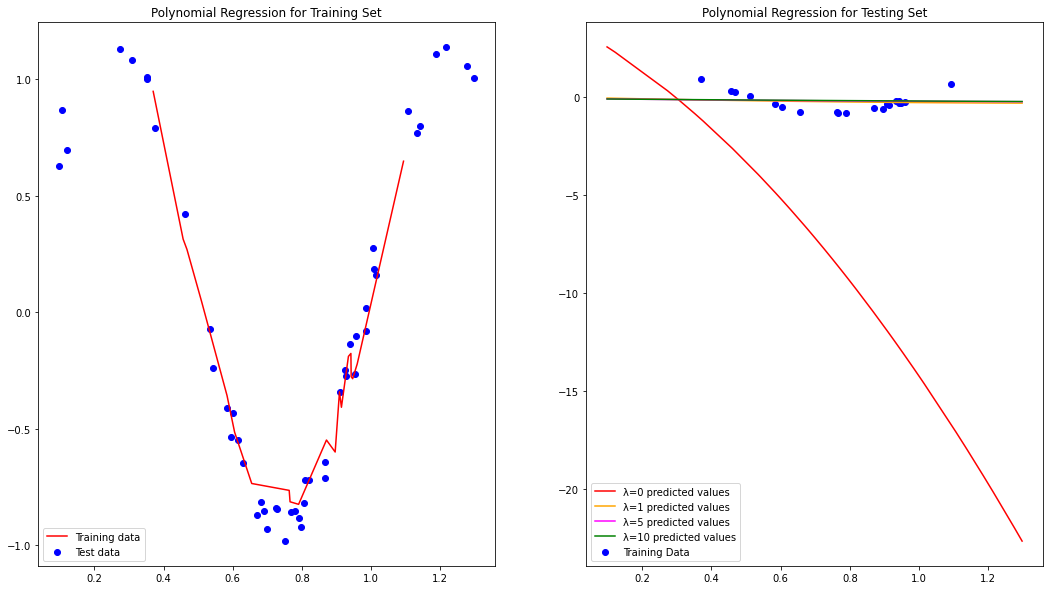

In [ ]:
# Plotting all the points to compare the regression graph

fig, axes = plt.subplots(1, 2, figsize=(18, 10))

df_train_sort = df_train.sort_values(by=['X_train'])
df_pred_sort_m2_0 = df_predicted_m2_0.sort_values(by=['X'])
df_pred_sort_m2_1 = df_predicted_m2_1.sort_values(by=['X'])
df_pred_sort_m2_5 = df_predicted_m2_5.sort_values(by=['X'])
df_pred_sort_m2_10 = df_predicted_m2_10.sort_values(by=['X'])

axes[0].plot(df_train_sort['X_train'], df_train_sort['Y_train'], color='red')
axes[0].scatter(df_test['X_test'], df_test['Y_test'], color='blue')
axes[0].legend(['Training data', 'Test data'])
axes[0].set_title('Polynomial Regression for Training Set')

axes[1].scatter(df_train['X_train'], df_train['Y_train'], color='blue')
axes[1].plot(df_pred_sort_m2_0['X'], df_pred_sort_m2_0['Y_predicted'], color='red')
axes[1].plot(df_pred_sort_m2_1['X'], df_pred_sort_m2_1['Y_predicted'], color='orange')
axes[1].plot(df_pred_sort_m2_5['X'], df_pred_sort_m2_5['Y_predicted'], color='magenta')
axes[1].plot(df_pred_sort_m2_10['X'], df_pred_sort_m2_10['Y_predicted'], color='green')
axes[1].legend(['λ=0 predicted values', 'λ=1 predicted values', 'λ=5 predicted values', 'λ=10 predicted values', 'Training Data'])
axes[1].set_title('Polynomial Regression for Testing Set')

#### RMSE for λ = 0, 1, 5, 10

In [ ]:
# λ = 0
y_vs_y_hat_m2 = pd.DataFrame(data=(np.array(df_predicted_m2_0['Y_predicted']), Y_test),index=['y predicted m2 λ0','Y_train']).T
y_vs_y_hat_m2['sum of square error'] = (y_vs_y_hat_m2['y predicted m2 λ0'] - y_vs_y_hat_m2['Y_train'])**2

rmse_m2_λ0 = 0

rmse_m2_λ0 = y_vs_y_hat_m2['sum of square error'].sum() / len(y_vs_y_hat_m2)
rmse_m2_λ0 = math.sqrt(rmse_m2_λ0)
rmse_m2_λ0

11.06933946205293

In [ ]:
# λ = 1
y_vs_y_hat_m2 = pd.DataFrame(data=(np.array(df_predicted_m2_1['Y_predicted']), Y_test),index=['y predicted m2 λ1','Y_train']).T
y_vs_y_hat_m2['sum of square error'] = (y_vs_y_hat_m2['y predicted m2 λ1'] - y_vs_y_hat_m2['Y_train'])**2

rmse_m2_λ1 = 0

rmse_m2_λ1 = y_vs_y_hat_m2['sum of square error'].sum() / len(y_vs_y_hat_m2)
rmse_m2_λ1 = math.sqrt(rmse_m2_λ1)
rmse_m2_λ1

0.7355330255029005

In [ ]:
# λ = 5
y_vs_y_hat_m2 = pd.DataFrame(data=(np.array(df_predicted_m2_5['Y_predicted']), Y_test),index=['y predicted m2 λ5','Y_train']).T
y_vs_y_hat_m2['sum of square error'] = (y_vs_y_hat_m2['y predicted m2 λ5'] - y_vs_y_hat_m2['Y_train'])**2

rmse_m2_λ5 = 0

rmse_m2_λ5 = y_vs_y_hat_m2['sum of square error'].sum() / len(y_vs_y_hat_m2)
rmse_m2_λ5 = math.sqrt(rmse_m2_λ5)
rmse_m2_λ5

0.7331499225477928

In [ ]:
# λ = 10
y_vs_y_hat_m2 = pd.DataFrame(data=(np.array(df_predicted_m2_0['Y_predicted']), Y_test),index=['y predicted m2 λ10','Y_train']).T
y_vs_y_hat_m2['sum of square error'] = (y_vs_y_hat_m2['y predicted m2 λ10'] - y_vs_y_hat_m2['Y_train'])**2

rmse_m2_λ10 = 0

rmse_m2_λ10 = y_vs_y_hat_m2['sum of square error'].sum() / len(y_vs_y_hat_m2)
rmse_m2_λ10 = math.sqrt(rmse_m2_λ10)
rmse_m2_λ10

11.06933946205293

### Order M = 5


In [ ]:
X = np.array(df_test['X_test'])
y_predicted_m5_0, y_predicted_m5_01, y_predicted_m5_001, y_predicted_m5_1 = [], [], [] ,[]

for val in X:
  y_val = 0
  for deg in range(5, -1, -1):
    y_val += reg_LSP_ord_5_0[0][deg] * math.pow(val, deg)
  y_predicted_m5_0.append(y_val)

for val in X:
  y_val = 0
  for deg in range(5, -1, -1):
    y_val += reg_LSP_ord_5_01[0][deg] * math.pow(val, deg)
  y_predicted_m5_01.append(y_val)

for val in X:
  y_val = 0
  for deg in range(5, -1, -1):
    y_val += reg_LSP_ord_5_001[0][deg] * math.pow(val, deg)
  y_predicted_m5_001.append(y_val)

for val in X:
  y_val = 0
  for deg in range(5, -1, -1):
    y_val += reg_LSP_ord_5_1[0][deg] * math.pow(val, deg)
  y_predicted_m5_1.append(y_val)

df_predicted_m5_0 = pd.DataFrame(data=(X, y_predicted_m5_0),index=['X', 'Y_predicted']).T
df_predicted_m5_01 = pd.DataFrame(data=(X, y_predicted_m5_01),index=['X', 'Y_predicted']).T
df_predicted_m5_001 = pd.DataFrame(data=(X, y_predicted_m5_001),index=['X', 'Y_predicted']).T
df_predicted_m5_1 = pd.DataFrame(data=(X, y_predicted_m5_1),index=['X', 'Y_predicted']).T

Text(0.5, 1.0, 'Polynomial Regression for Testing Set')

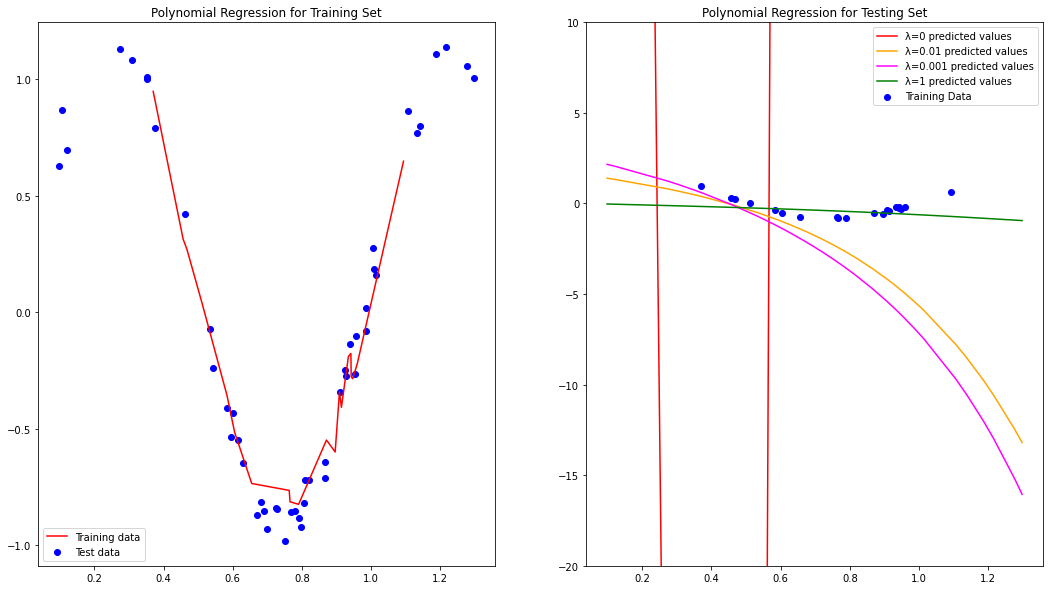

In [ ]:
# Plotting all the points to compare the regression graph

fig, axes = plt.subplots(1, 2, figsize=(18, 10))

df_train_sort = df_train.sort_values(by=['X_train'])
df_pred_sort_m5_0 = df_predicted_m5_0.sort_values(by=['X'])
df_pred_sort_m5_01 = df_predicted_m5_01.sort_values(by=['X'])
df_pred_sort_m5_001 = df_predicted_m5_001.sort_values(by=['X'])
df_pred_sort_m5_1 = df_predicted_m5_1.sort_values(by=['X'])

axes[0].plot(df_train_sort['X_train'], df_train_sort['Y_train'], color='red')
axes[0].scatter(df_test['X_test'], df_test['Y_test'], color='blue')
axes[0].legend(['Training data', 'Test data'])
axes[0].set_title('Polynomial Regression for Training Set')

axes[1].scatter(df_train['X_train'], df_train['Y_train'], color='blue')
axes[1].plot(df_pred_sort_m5_0['X'], df_pred_sort_m5_0['Y_predicted'], color='red')
axes[1].plot(df_pred_sort_m5_01['X'], df_pred_sort_m5_01['Y_predicted'], color='orange')
axes[1].plot(df_pred_sort_m5_001['X'], df_pred_sort_m5_001['Y_predicted'], color='magenta')
axes[1].plot(df_pred_sort_m5_1['X'], df_pred_sort_m5_1['Y_predicted'], color='green')
axes[1].set_ylim((-20, 10))
axes[1].legend(['λ=0 predicted values', 'λ=0.01 predicted values', 'λ=0.001 predicted values', 'λ=1 predicted values', 'Training Data'])
axes[1].set_title('Polynomial Regression for Testing Set')

#### RMSE for λ = 0, 1, 5, 10

In [ ]:
# λ = 0
y_vs_y_hat_m5 = pd.DataFrame(data=(np.array(df_predicted_m5_0['Y_predicted']), Y_test),index=['y predicted m5 λ0','Y_train']).T
y_vs_y_hat_m5['sum of square error'] = (y_vs_y_hat_m5['y predicted m5 λ0'] - y_vs_y_hat_m5['Y_train'])**2

rmse_m5_λ0 = 0

rmse_m5_λ0 = y_vs_y_hat_m5['sum of square error'].sum() / len(y_vs_y_hat_m5)
rmse_m5_λ0 = math.sqrt(rmse_m5_λ0)
rmse_m5_λ0

10931.00905354445

In [ ]:
# λ = 0.01
y_vs_y_hat_m5 = pd.DataFrame(data=(np.array(df_predicted_m5_01['Y_predicted']), Y_test),index=['y predicted m5 λ01','Y_train']).T
y_vs_y_hat_m5['sum of square error'] = (y_vs_y_hat_m5['y predicted m5 λ01'] - y_vs_y_hat_m5['Y_train'])**2

rmse_m5_λ01 = 0

rmse_m5_λ01 = y_vs_y_hat_m5['sum of square error'].sum() / len(y_vs_y_hat_m5)
rmse_m5_λ01 = math.sqrt(rmse_m5_λ01)
rmse_m5_λ01

4.945837065232789

In [ ]:
# λ = 0.001
y_vs_y_hat_m5 = pd.DataFrame(data=(np.array(df_predicted_m5_001['Y_predicted']), Y_test),index=['y predicted m5 λ001','Y_train']).T
y_vs_y_hat_m5['sum of square error'] = (y_vs_y_hat_m5['y predicted m5 λ001'] - y_vs_y_hat_m5['Y_train'])**2

rmse_m5_λ001 = 0

rmse_m5_λ001 = y_vs_y_hat_m5['sum of square error'].sum() / len(y_vs_y_hat_m5)
rmse_m5_λ001 = math.sqrt(rmse_m5_λ001)
rmse_m5_λ001

6.121635748872599

In [ ]:
# λ = 1
y_vs_y_hat_m5 = pd.DataFrame(data=(np.array(df_predicted_m5_1['Y_predicted']), Y_test),index=['y predicted m5 λ1','Y_train']).T
y_vs_y_hat_m5['sum of square error'] = (y_vs_y_hat_m5['y predicted m5 λ1'] - y_vs_y_hat_m5['Y_train'])**2

rmse_m5_λ1 = 0

rmse_m5_λ1 = y_vs_y_hat_m5['sum of square error'].sum() / len(y_vs_y_hat_m5)
rmse_m5_λ1 = math.sqrt(rmse_m5_λ1)
rmse_m5_λ1

0.8761139769840955

# Real World Dataset

## Consider the motorcycle dataset. Estimate the Regularized Least Square regression models using the n sigmoidal basis functions. A variant of sigmoidal basis function can be obtained using 

## σ(a, b, x) = $a^{T}$x + b , a ∈ $R^{n}$, b ∈ R for x ∈ $R^{n}$


##I. Plot the estimated function and obtain the training RMSE error for n = 2, 5 , 10. What happens when you increase the number of basis functions.

## II. For n =10, find the minimum mean and standard deviations of RMSE, NMSE and R2 using leave-one out method by tunning the parameter λ.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random

In [ ]:
#Lets export our data into your file which is in Excel format 
df=pd.read_excel('/content/motorcycle.xlsx')

In [ ]:
# checking on our dataset : It will give top 5 values 
df.head()
#the next step is to take out relavent information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       133 non-null    float64
 1   y       133 non-null    float64
dtypes: float64(2)
memory usage: 2.2 KB


In [ ]:
# Now lets analyse our given question below :


In [ ]:
#The values of the features/input is as below
x = df['x']
x
y= df['y']
y

0       0.0
1      -1.3
2      -2.7
3       0.0
4      -2.7
       ... 
128   -14.7
129    -2.7
130    10.7
131    -2.7
132    10.7
Name: y, Length: 133, dtype: float64

In [ ]:
#we will now put it in a list(our x variable) :
x1=x.tolist()
xtraining=x1[:-1]
#we will now put it in a list(our y variable) :
y1 = y.tolist()
ytraining = y1[:-1]
# let us reconfirm our length of the size :
len(ytraining)
len(xtraining)
# hence we for now have removed our last element to treat it as testing set 

132

In [ ]:
#After this we have given with the sigmoidal function :
#Lets work on this
#This function will give the value between 0 and 1 for the infite number of its input

sigmoidal = []

for i in range(0,len(xtraining)):
    sigmoidal.append(1/(1 + np.exp(-xtraining[i])))
#lets check the output 
sigmoidal
#to make sure that ever elemts has been taken we can check the length :
len(sigmoidal)

132

In [ ]:
#the comparison of the changed value :
x1

[2.4,
 2.6,
 3.2,
 3.6,
 4.0,
 6.2,
 6.6,
 6.8,
 7.8,
 8.2,
 8.8,
 8.8,
 9.6,
 10.0,
 10.2,
 10.6,
 11.0,
 11.4,
 13.2,
 13.6,
 13.8,
 14.6,
 14.6,
 14.6,
 14.6,
 14.6,
 14.6,
 14.8,
 15.4,
 15.4,
 15.4,
 15.4,
 15.6,
 15.6,
 15.8,
 15.8,
 16.0,
 16.0,
 16.2,
 16.2,
 16.2,
 16.4,
 16.4,
 16.6,
 16.8,
 16.8,
 16.8,
 17.6,
 17.6,
 17.6,
 17.6,
 17.8,
 17.8,
 18.6,
 18.6,
 19.2,
 19.4,
 19.4,
 19.6,
 20.2,
 20.4,
 21.2,
 21.4,
 21.8,
 22.0,
 23.2,
 23.4,
 24.0,
 24.2,
 24.2,
 24.6,
 25.0,
 25.0,
 25.4,
 25.4,
 25.6,
 26.0,
 26.2,
 26.2,
 26.4,
 27.0,
 27.2,
 27.2,
 27.2,
 27.6,
 28.2,
 28.4,
 28.4,
 28.6,
 29.4,
 30.2,
 31.0,
 31.2,
 32.0,
 32.0,
 32.8,
 33.4,
 33.8,
 34.4,
 34.8,
 35.2,
 35.2,
 35.4,
 35.6,
 35.6,
 36.2,
 36.2,
 38.0,
 38.0,
 39.2,
 39.4,
 40.0,
 40.4,
 41.6,
 41.6,
 42.4,
 42.8,
 42.8,
 43.0,
 44.0,
 44.4,
 45.0,
 46.6,
 47.8,
 47.8,
 48.8,
 50.6,
 52.0,
 53.2,
 55.0,
 55.0,
 55.4,
 57.6]

In [ ]:
sigmoidal

[0.9168273035060777,
 0.9308615796566533,
 0.9608342772032357,
 0.973403006423134,
 0.9820137900379085,
 0.9979746796109501,
 0.9986414800495711,
 0.9988874639671398,
 0.9995904328350139,
 0.9997254218438986,
 0.9998492896419403,
 0.9998492896419403,
 0.9999322758503804,
 0.9999546021312976,
 0.9999628310628971,
 0.9999750846110607,
 0.999983298578152,
 0.999988804640495,
 0.9999981494022271,
 0.9999987595064589,
 0.9999989843695606,
 0.9999995436475715,
 0.9999995436475715,
 0.9999995436475715,
 0.9999995436475715,
 0.9999995436475715,
 0.9999995436475715,
 0.9999996263702017,
 0.9999997949475846,
 0.9999997949475846,
 0.9999997949475846,
 0.9999997949475846,
 0.9999998321172752,
 0.9999998321172752,
 0.9999998625492461,
 0.9999998625492461,
 0.9999998874648379,
 0.9999998874648379,
 0.9999999078640001,
 0.9999999078640001,
 0.9999999078640001,
 0.9999999245654222,
 0.9999999245654222,
 0.9999999382393905,
 0.9999999494346891,
 0.9999999494346891,
 0.9999999494346891,
 0.9999999772795

In [ ]:
#Below are the value we will be considering for testing our model 
xtesting = np.array(x1[-1:])
print(xtesting)

ytesting = np.array(y1[-1:])
print(ytesting)
len(xtesting)

[57.6]
[10.7]


1

In [ ]:
#This fuction will help us with the basis function in determining the values of A and B :
#We need to find : m1(Φ1)+ m2(Φ2) = y
#We are finding Φ:

def Coff_data(num_of_coff):
    A =[]
    B =[]
    for i in range(num_of_coff):
        A.append(random.random())
        
    for j in range(num_of_coff):
        B.append(random.random())
    #Sorting out values 
    A_coff =np.sort(np.array(A))
    B_coff = np.sort(np.array(B))
    return A_coff,B_coff
#checking for a and b for m=2
Coff_data(2)
# #checking for a and b for m=5
# Coff_data(5)
# #checking for a and b for m=10
# Coff_data(10)        
            

(array([0.30908594, 0.57889732]), array([0.22750521, 0.48499792]))

In [ ]:
#assigning variables to the the cofficient to use it further in the code 
#this has been used for training and testing set both for cofficient A and B 
A2, B2= Coff_data(2)
A5, B5= Coff_data(5)
A10, B10= Coff_data(10)

A2t, B2t= Coff_data(2)
A5t, B5t= Coff_data(5)
A10t, B10t= Coff_data(10)

In [ ]:
# Calculating Φ --> ax +b for m =2,5,10
def sigmoid(A,B,X,n):
  Sig=[]
  for i in range(len(X)):
    Sig.append([])
    for j in range(n):
      #print(A[j],x[i],B[j])
      Sig[i].append((A[j]*X[i])+B[j])
    Sig[i].append(1)
  return Sig
#Our traning set 
# m =2
S2=np.array(sigmoid(A2,B2,xtraining,2))
# m = 5
S5=np.array(sigmoid(A5,B5,xtraining,5))
# m = 10
S10=np.array(sigmoid(A10,B10,xtraining,10))
#Our testing set 
# m =2
S2_testing=np.array(sigmoid(A2t,B2t,xtesting,2))
# m = 5
S5_testing=np.array(sigmoid(A5t,B5t,xtesting ,5))
# m = 10
S10_testing=np.array(sigmoid(A10t,B10t,xtesting,10))
print(S2.shape) # To do calculation we will check it shape 
 #lets analyse our data one by one 
print('For m = 2  -> training data : ',S2)
print('For m = 5  -> training data : ',S5)
print('For m = 10  -> training data : ',S10)
print('For m = 2  -> testing data : ',S2_testing)
print('For m = 5  -> testing data : ',S5_testing)
print('For m = 10  -> testing data : ',S10_testing)

(132, 3)
For m = 2  -> training data :  [[ 0.67480457  0.8378018   1.        ]
 [ 0.72135026  0.88660591  1.        ]
 [ 0.86098734  1.03301826  1.        ]
 [ 0.95407872  1.13062649  1.        ]
 [ 1.04717011  1.22823472  1.        ]
 [ 1.55917273  1.76507998  1.        ]
 [ 1.65226411  1.86268821  1.        ]
 [ 1.69880981  1.91149232  1.        ]
 [ 1.93153827  2.1555129   1.        ]
 [ 2.02462965  2.25312112  1.        ]
 [ 2.16426673  2.39953347  1.        ]
 [ 2.16426673  2.39953347  1.        ]
 [ 2.3504495   2.59474993  1.        ]
 [ 2.44354089  2.69235816  1.        ]
 [ 2.49008658  2.74116227  1.        ]
 [ 2.58317797  2.8387705   1.        ]
 [ 2.67626935  2.93637873  1.        ]
 [ 2.76936074  3.03398696  1.        ]
 [ 3.18827197  3.47322399  1.        ]
 [ 3.28136336  3.57083222  1.        ]
 [ 3.32790905  3.61963634  1.        ]
 [ 3.51409182  3.8148528   1.        ]
 [ 3.51409182  3.8148528   1.        ]
 [ 3.51409182  3.8148528   1.        ]
 [ 3.51409182  3.8148528

In [ ]:
#Applying sigmoid function that we have learned earlier which give value between 0 and 1 
#Please note that this function can take value from -infitity to + infinity
def adding_sig_training(xe,n):
    I = np.identity(n+1)
    A_training=[]
    for i in range(len(xtraining)):
        A_training.append([])
        for j in range(n+1):
            A_training[i].append(1/(1 + np.exp(-xe[i][j])))
    return A_training,I
  
def adding_sig_testing(xe,n):
    I = np.identity(n+1)
    A_testing=[]
    for i in range(len(xtesting)):
        A_testing.append([])
        for j in range(n+1):
            A_testing[i].append(1/(1 + np.exp(-xe[i][j])))
    return A_testing,I

In [ ]:
# We will be using the these for out function , we further just need to get the dot product by taking different value of lambda

A2_new,I2=adding_sig_training(S2,2)
# print('The coff after the sigmoid function: ',A2_new,' ','Identity matrix: ',I2)
A5_new,I5=adding_sig_training(S5,5)
# print('The coff after the sigmoid function: ',A5_new,' ','Identity matrix: ',I5)
A10_new,I10=adding_sig_training(S10,10)
# print('The coff after the sigmoid function: ',A10_new,' ','Identity matrix: ',I10)

A2_new_shape=np.array(A2_new)
#print(A2_new_shape)
i=np.array(I2)
#print(i)
A2_new_t,I2_t=adding_sig_testing(S2_testing,2)
# print('The coff after the sigmoid function testing dataset: ',A2_new,' ','Identity matrix: ',I2)
A5_new_t,I5_t=adding_sig_testing(S5_testing,5)
# print('The coff after the sigmoid function testing dataset: ',A5_new,' ','Identity matrix: ',I5)
A10_new_t,I10_t=adding_sig_testing(S10_testing,10)
# print('The coff after the sigmoid function testing dataset: ',A10_new,' ','Identity matrix: ',I10)



In [ ]:
#let the value of lambda be small as 0.01 
def predict_new_coff(M,y1,I):
    templ=np.dot(0.01,I)
    temp=np.add(templ,np.dot(np.transpose(M),M))
    temp1=np.linalg.inv(temp)
    temp2=np.dot(np.transpose(M),y1)
    temp3=np.dot(temp1,temp2)
    return temp3

In [ ]:
#printing coff
#here we want to determine out m :#We need to find : m1(Φ1)+ m2(Φ2) = y
#FOR M=2 
A2_final_weight=predict_new_coff(A2_new,ytraining,I2)
print(A2_final_weight)
#FOR M=5
A5_final_weight=predict_new_coff(A5_new,ytraining,I5)
print(A5_final_weight)
#FOR M=10
A10_final_weight=predict_new_coff(A10_new,ytraining,I10)
print(A10_final_weight)
#testing data :
#FOR M=2

A2_final__t_weight=predict_new_coff(A2_new_t,ytesting,I2_t)
print(A2_final__t_weight)
#FOR M=5
A5_final__t_weight=predict_new_coff(A5_new_t,ytesting,I5_t)
print(A5_final__t_weight)
#FOR M=10
A10_final_t_weight=predict_new_coff(A10_new_t,ytesting,I10_t)
print(A10_final_t_weight)

[   4.25724001 -114.27420215  111.60021675]
[ 468.29110118 -886.90703143  380.71248609  279.51546911  -55.32956781
 -238.48273118]
[ 517.88215533 -648.7891187  -389.38772356  -57.84149766  -49.55738938
  538.46270264  506.87611104  -37.39613368  -99.54743887 -114.58544375
 -215.48509689]
[4.20523654 4.20523654 3.07427425]
[1.92985861 1.92985915 1.92985915 1.92985915 1.92985915 1.41084008]
[0.92703333 1.03397864 1.03399288 1.033993   1.033993   1.033993
 1.033993   1.033993   1.033993   1.033993   0.75590946]


In [ ]:
#Now we will be getting our predicted value of the function

def y_predicted(train,co):
    y_predict=[]
    y_predict.append(np.dot(train,co))
    return y_predict


In [ ]:

A2_y_pred=np.transpose(y_predicted(A2_new,A2_final_weight))
A5_y_pred=np.transpose(y_predicted(A5_new,A5_final_weight))
A10_y_pred=np.transpose(y_predicted(A10_new,A10_final_weight))


A2_y_pred_t=np.transpose(y_predicted(A2_new_t,A2_final__t_weight))
A5_y_pred_t=np.transpose(y_predicted(A5_new_t,A5_final__t_weight))
A10_y_pred_t=np.transpose(y_predicted(A10_new_t,A10_final_t_weight))

In [ ]:
def cal_rmse(y_pred,y_train):
  sum=0
  for i in range(132):
    mt_minus=(y_pred[i]-y_train[i]) ** 2
    sum = sum + mt_minus
  error=np.sqrt(sum/132)
  return error


def cal_rmse_test(y_pred,y_train):
  sum=0
  for i in range(1):
    mt_minus=(y_pred[i]-y_train[i]) ** 2
    sum = sum + mt_minus
  error=np.sqrt(sum/1)
  return error

In [ ]:
#FOR M=2 the RMSE training is  :
A2_rmse=cal_rmse(A2_y_pred,ytraining)
#FOR M=5 the RMSE training is :
A5_rmse=cal_rmse(A5_y_pred,ytraining)
#FOR M=10 the RMSE training is :
A10_rmse=cal_rmse(A10_y_pred,y)


#FOR M=2 the RMSE testing is  :
A2_rmse_test=cal_rmse_test(A2_y_pred_t,ytesting)

#FOR M=5 the RMSE testing is  :
A5_rmse_test=cal_rmse_test(A5_y_pred_t,ytesting)

#FOR M=10 the RMSE testing is  :
A10_rmse_test=cal_rmse_test(A10_y_pred_t,ytesting)

#Output RMSE
print(A2_rmse)
print(A5_rmse)
print(A10_rmse)


[47.79162892]
[41.16149927]
[40.68698006]


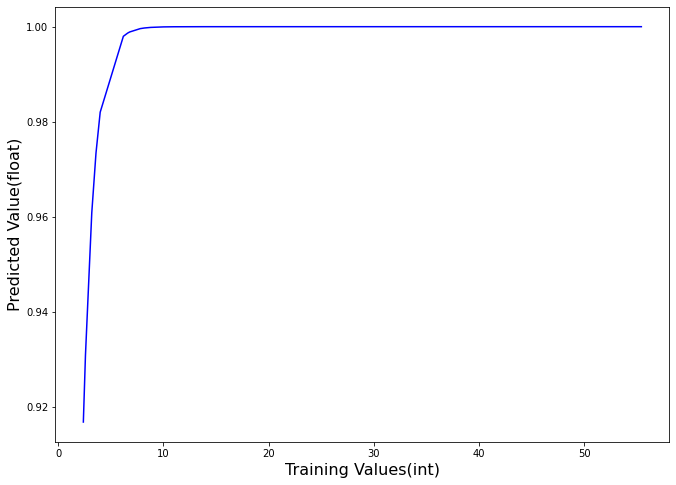

In [ ]:
#This make a figure for your choice size 
plt.figure(figsize=(11,8))
#this is the sigmoidal list we have used earlier in the step and xtraining data
plt.plot(xtraining,sigmoidal,color='b', label='Linear Regression')


plt.xlabel('Training Values(int)',fontsize=16)
plt.ylabel('Predicted Value(float)',fontsize=16)

plt.show()

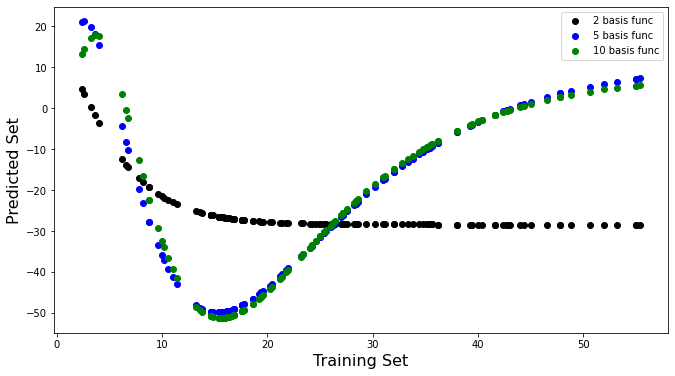

In [ ]:
#This make a figure for your choice size 

plt.figure(figsize=(11,6))
plt.scatter(xtraining, A2_y_pred,color='black', label='2 basis func')
plt.scatter(xtraining, A5_y_pred,color='blue', label='5 basis func')
plt.scatter(xtraining, A10_y_pred,color='green', label='10 basis func')


plt.xlabel('Training Set',fontsize=16)
plt.ylabel('Predicted Set',fontsize=16)
plt.legend()
plt.show()

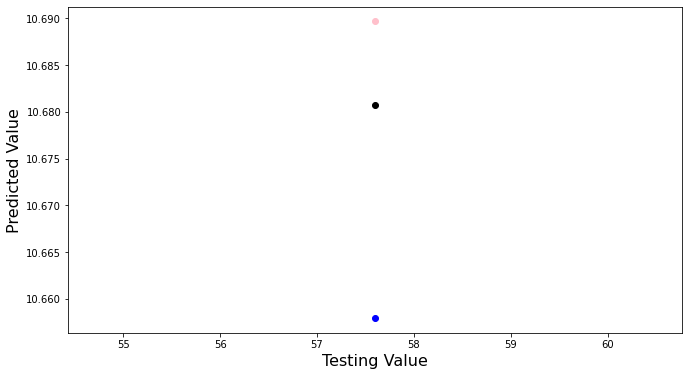

In [ ]:
plt.figure(figsize=(11,6))
plt.scatter(xtesting, A10_y_pred_t,color='pink', label='Linear Regression')
plt.scatter(xtesting, A2_y_pred_t,color='blue', label='Linear Regression')
plt.scatter(xtesting, A5_y_pred_t,color='black', label='Linear Regression')
plt.xlabel('Testing Value',fontsize=16)
plt.ylabel('Predicted Value',fontsize=16)

plt.show()

##### After encountering leave one out method lets us see : What happens when you increase the number of basis functions.

##### 1 )We can see that increasing the number of basis functions makes a better model, until we start overfitting.
##### 2) Time complexity also increases 
##### 3 )RMSE Value decreases with increase in the value of M
##### 4)We can see that even though we overfit to begin with, we can adjust the regularization parameter λ to prevent it

## Consider the Boston Housing dataset. Use the ten-fold cross validation for obtaining the prediction of house price using the regularized least square RBF kernel regression model. By tunning the regularization parameter λ and RBF kernel parameter σ , obtain the minimum of mean of RMSE, NMSE, R2, MAE,training times (in seconds) along with their standard deviation across different folds.



In [ ]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [ ]:
df=pd.read_excel('/content/bostonhousing.xlsx')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   x1                                                    506 non-null    float64
 1   x2                                                    506 non-null    float64
 2   x3                                                    506 non-null    float64
 3   x4                                                    506 non-null    float64
 4   x5                                                    506 non-null    int64  
 5   x6                                                    506 non-null    float64
 6   x7                                                    506 non-null    float64
 7   x8                                                    506 non-null    float64
 8   x9                                                    506 no

In [ ]:
trainx1=df['x1']
trainx2=df['x2']
trainx3=df['x3']
trainx4=df['x4']
trainx5=df['x5']
trainx6=df['x6']
trainx7=df['x7']
trainx8=df['x8']
trainx9=df['x9']
trainx10=df['x10']
trainx11=df['x11']
trainx12=df['x12']
trainx13=df['x13']

In [ ]:
def normal_distribution(std,mean,x):
  return (np.pi*std) * np.exp(-0.5*((x-mean)/std)**2)

In [ ]:
trainx=np.zeros([400,13])
#group x1 and x2 in x
for i in range(400):
    trainx[i][0]=trainx1[i]
    trainx[i][1]=trainx2[i]
    trainx[i][2]=trainx3[i]
    trainx[i][3]=trainx4[i]
    trainx[i][4]=trainx5[i]
    trainx[i][5]=trainx6[i]
    trainx[i][6]=trainx7[i]
    trainx[i][7]=trainx8[i]
    trainx[i][8]=trainx9[i]
    trainx[i][9]=trainx10[i]
    trainx[i][10]=trainx11[i]
    trainx[i][11]=trainx12[i]
    trainx[i][12]=trainx13[i]
trainy=np.zeros(400)
for i in range(400):
    trainy[i]=math.sin(2*math.pi*((trainx1[i]**2+trainx2[i]**2)**0.5))+ normal_distribution(0.0,0.25,trainx1[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


In [ ]:
testx1=df['x1']
testx2=df['x2']
testx3=df['x3']
testx4=df['x4']
testx5=df['x5']
testx6=df['x6']
testx7=df['x7']
testx8=df['x8']
testx9=df['x9']
testx10=df['x10']
testx11=df['x11']
testx12=df['x12']
testx13=df['x13']

In [ ]:

testx=np.zeros([106,13])
for i in range(106):
    testx[i][0]=testx1[i]
    testx[i][1]=testx2[i]
    testx[i][2]=testx3[i]
    testx[i][3]=testx4[i]
    testx[i][4]=testx5[i]
    testx[i][5]=testx6[i]
    testx[i][6]=testx7[i]
    testx[i][7]=testx8[i]
    testx[i][8]=testx9[i]
    testx[i][9]=testx10[i]
    testx[i][10]=testx11[i]
    testx[i][11]=testx12[i]
    testx[i][12]=testx13[i]
testy=np.zeros(106)

for i in range(106):
  testy[i]=math.sin(2*math.pi*(testx1[i]**2+testx2[i]**2)**0.5)+ normal_distribution(0.0,0.25,testx1[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


##### compute the RMSE for regularizedleast squares kernel regression model with the RBF kernel K(x,y) = exp(- (||x-y|| 2 /σ). using the direct method. 

In [ ]:
def get_kernel(x1,x2,sigma):
  kernel=math.exp(-np.linalg.norm(x1-x2)/sigma)
  return kernel  

In [ ]:
def get_weights(x,y,sigma,lambd):
  kernels=np.zeros((len(x),len(x)+1))
  weights=np.zeros(len(x)+1)
  for i in range(len(x)):
    for j in range(len(x)):
      kernels[i,j] = get_kernel(x[i],x[j],sigma)
  #Adding Bias
  kernels[:,len(x):len(x)+1]=1
  identity=np.identity(kernels.shape[1])
  weights=np.linalg.inv((kernels.T).dot(kernels)+lambd*identity).dot((kernels.T).dot(y))
  return [weights,kernels]

In [ ]:
def get_test_kernel(x,test_x,w,sigma):
  kernel2=np.zeros([len(test_x),len(x)+1])
  y_predicted=np.zeros(len(test_x))
  for i in range(len(test_x)):
    for j in range(len(x)):
      kernel2[i,j]=get_kernel(x[j],test_x[i],sigma)
  kernel2[:,len(x):len(x)+1]=1        
  return kernel2
def get_rms_kernel(kernel2,y,w): 
  y_predicted=np.dot(kernel2,w)
  rms=((np.sum((y_predicted-y)**2))/len(y))**0.5
  return [rms,y_predicted]

In [ ]:
sigma=5
lambd=0.0001
[weight,train_kernel]=get_weights(trainx,trainy,sigma,lambd)
test_kernel=get_test_kernel(trainx,testx,weight,sigma)
[rms_kernel,y_predicted_kernel]=get_rms_kernel(test_kernel,testy,weight)
print("Predicted values for direct kernel")
print(y_predicted_kernel)
print("rms for direct kernel:",rms_kernel)

Predicted values for direct kernel
[ 6.18042009e-06 -5.87820134e-01 -9.50989786e-01  5.87683777e-01
  9.51063485e-01 -9.50952100e-01 -5.86853443e-01  5.89670371e-01
 -8.49512410e-03 -5.83841298e-01  1.05783007e-02 -5.85875731e-01
 -9.51341873e-01  5.37207161e-01  9.70193206e-01 -5.36261490e-01
  7.02705422e-01 -1.10096702e-01  9.77094804e-01  9.75077048e-01
 -8.35594310e-01 -6.77608075e-01  9.99668131e-01 -2.09870375e-01
 -6.75131300e-01 -4.51829647e-01 -6.54554537e-01 -8.73689719e-01
  5.02204597e-01  1.49738967e-01 -9.98985170e-01 -3.86584722e-01
  9.89680189e-01  8.09960624e-01 -5.67203705e-01 -5.87127483e-01
  1.51863430e-03  9.73883372e-04 -9.52143973e-01 -9.50947700e-01
 -5.87677981e-01 -5.89144641e-01  9.50048128e-01 -9.51951615e-01
  9.51650998e-01  9.47690912e-01  7.44410657e-03 -5.95735385e-01
  5.76279159e-01  5.81364027e-01 -9.51342497e-01 -2.95425553e-04
  7.04007581e-04  5.87155445e-01 -5.87700961e-01  5.87715477e-01
 -9.50988786e-01 -5.87741846e-01  9.49925527e-01 -5.891

**Kernel**

---



In [ ]:
def gradient_descent_kernel(x,y,weight,epoch,learning_rate):
  for i in range(epoch) :        
            h = x.dot(weight)
            error = h - y
            weight = weight-learning_rate*( 1 / x.shape[1] ) *np.dot( x.T, error)         
  return weight

In [ ]:
[weight_kernel_gradient,train_kernel_gradient_descent]=get_weights(trainx,trainy,sigma,lambd)
test_kernel_gradient_descent=get_test_kernel(trainx,testx,weight_kernel_gradient,sigma)
initial_weight=np.zeros(train_kernel_gradient_descent.shape[1])
epoch=200
learning_rate=0.005
weight_kernel_gradient=gradient_descent_kernel(train_kernel_gradient_descent,trainy,initial_weight,epoch,learning_rate)